In [81]:
#importing some of the libraries relevant to the project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [82]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
DATA_PATH = "/content/drive/MyDrive/Amdari_Colab_Datasets/nova_pay_combined.csv"

In [84]:
import pandas as pd

df = pd.read_csv(DATA_PATH)
df.head()

,transaction_id,customer_id,timestamp,home_country,source_currency,dest_currency,channel,amount_src,amount_usd,fee,...,ip_risk_score,kyc_tier,account_age_days,device_trust_score,chargeback_history_count,risk_score_internal,txn_velocity_1h,txn_velocity_24h,corridor_risk,is_fraud
0,fee8542d-8ee6-4b0d-9671-c294dd08ed26,402cccc9-28de-45b3-9af7-cc5302aa1f93,2022-10-03 18:40:59.468549+00:00,US,USD,CAD,ATM,278.19,278.19,4.25,...,0.123,standard,263,0.522,0,0.223,0,0,0.0,0
1,bfdb9fc1-27fe-4a85-b043-4d813d679259,67c2c6b3-ef0a-4777-a3f1-c84a851bb6ad,2022-10-03 20:39:38.468549+00:00,CA,CAD,MXN,web,208.51,154.29,4.24,...,0.569,standard,947,0.475,0,0.268,0,1,0.0,0
2,fc855034-3ea5-4993-9afa-b511d93fe5e8,6d0d9b27-fa26-45f8-93b1-2df29d182d9c,2022-10-03 23:02:43.468549+00:00,US,USD,CNY,mobile,160.33,160.33,2.70,...,0.437,enhanced,367,0.939,0,0.176,0,0,0.0,0
3,2cf8c08e-42ec-444d-a755-34b9a2a0a4ca,7bd5200c-5d19-44f0-9afe-8b339a05366b,2022-10-04 01:08:53.468549+00:00,US,USD,EUR,mobile,59.41,59.41,2.22,...,0.594,standard,147,0.551,0,0.391,0,0,0.0,0
4,d907a74d-b426-438d-97eb-dbe911aca91c,70a93d26-8e3a-4179-900c-a4a7a74d08e5,2022-10-04 09:35:03.468549+00:00,US,USD,INR,mobile,200.96,200.96,3.61,...,0.121,enhanced,257,0.894,0,0.257,0,0,0.0,0


In [85]:
# Getting more information about our dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11400 entries, 0 to 11399
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   transaction_id             11400 non-null  object 
 1   customer_id                11400 non-null  object 
 2   timestamp                  11371 non-null  object 
 3   home_country               11400 non-null  object 
 4   source_currency            11400 non-null  object 
 5   dest_currency              11400 non-null  object 
 6   channel                    11400 non-null  object 
 7   amount_src                 11400 non-null  object 
 8   amount_usd                 11095 non-null  float64
 9   fee                        11105 non-null  float64
 10  exchange_rate_src_to_dest  11400 non-null  float64
 11  device_id                  11400 non-null  object 
 12  new_device                 11400 non-null  bool   
 13  ip_address                 11095 non-null  obj

**OBSERVATION**

## 1. There are missing data from the following fields: timestamp, amount_usd, fee, ip_adddress,ip_country, and device_trust_score.

## 2. Also, the datatype for timestamp is supposed to be in datetime, and that of the amount_src is suposed to be in float, but currently appears as object data type.

## Let's examine the unique categories of some of the categorical features in our dataset

In [86]:
print(f"Home country unique categories: {df["home_country"].unique()}")
print(f"Channel unique categories: {df["channel"].unique()}")
print(f"kyc_tier unique categories: {df["kyc_tier"].unique()}")
print(f"ip_country unique categories: {df["ip_country"].unique()}")
print(f"source_currency uniqe categories: {df["source_currency"].unique()}")
print(f"dest_currency unique categories: {df["dest_currency"].unique()}")
print(f"location_mismatch unique categories: {df["location_mismatch"].unique()}")
print(f"is_fraud unique categories: {df["is_fraud"].unique()}")



Home country unique categories: ['US' 'CA' 'UK' ' UK  ' ' US  ' 'unknown' ' CA  ']
Channel unique categories: ['ATM' 'web' 'mobile' 'WEB' ' web  ' 'MOBILE' 'mobille' 'unknown'
 ' mobile  ' 'weeb' 'ATm' ' ATM  ']
kyc_tier unique categories: ['standard' 'enhanced' 'low' ' standard  ' nan 'standrd' ' enhanced  '
 'STANDARD' 'NAN' 'unknown' 'enhancd' ' low  ' 'ENHANCED' 'LOW' ' nan  ']
ip_country unique categories: ['US' 'CA' nan 'UK' ' US  ' 'NAN' 'unknown' ' CA  ' ' UK  ' ' nan  ']
source_currency uniqe categories: ['USD' 'CAD' 'GBP']
dest_currency unique categories: ['CAD' 'MXN' 'CNY' 'EUR' 'INR' 'GBP' 'PHP' 'NGN' 'USD']
location_mismatch unique categories: [False  True]
is_fraud unique categories: [0 1]


# **OBSERVATION**

## Obviously, there are issues with some of the categories of some of the features above which must be corrected in order to get a better analysis

In [87]:
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

df[categorical_cols] = (
    df[categorical_cols]
    .apply(lambda col: (
        col.astype(str)
           .str.strip()
           .str.lower()
           .str.replace(r"\s+", " ", regex=True)
    ))
)


In [88]:
# To see the unique items in the list itself:
print(set(categorical_cols))

# If you meant to check the unique categories within each of the columns listed in 'categorical_cols' from the DataFrame 'df':
for col in categorical_cols:
    print(f"Unique categories for '{col}': {df[col].unique()}")

{'dest_currency', 'customer_id', 'home_country', 'ip_country', 'source_currency', 'transaction_id', 'device_id', 'timestamp', 'kyc_tier', 'ip_address', 'channel', 'amount_src'}
Unique categories for 'transaction_id': ['fee8542d-8ee6-4b0d-9671-c294dd08ed26'
 'bfdb9fc1-27fe-4a85-b043-4d813d679259'
 'fc855034-3ea5-4993-9afa-b511d93fe5e8' ...
 '6a51f0e8-f5d1-4fe6-91a0-655fccd79fa5'
 '4aad7389-2b62-4885-a23e-aa3ecd5cfaf9'
 'fdffeb16-192a-4483-9b1e-9928e23269c2']
Unique categories for 'customer_id': ['402cccc9-28de-45b3-9af7-cc5302aa1f93'
 '67c2c6b3-ef0a-4777-a3f1-c84a851bb6ad'
 '6d0d9b27-fa26-45f8-93b1-2df29d182d9c' ...
 '2003e2a1-f3b1-4e2e-8d0e-488cfacf68ca'
 '8b1cf558-4ed7-48ee-b330-75db6efd4840'
 'b69010dc-ab0a-4fd2-a79e-65e4c6efbcd9']
Unique categories for 'timestamp': ['2022-10-03 18:40:59.468549+00:00' '2022-10-03 20:39:38.468549+00:00'
 '2022-10-03 23:02:43.468549+00:00' ... '2025-11-27 06:19:11.573611+00:00'
 '2025-11-28 00:53:28.573611+00:00' '2025-11-29 20:10:47.573611+00:00']
Uni

#Now, we are going to replace "unknown" category with "NAN"

In [89]:
import numpy as np

# Assuming 'df' is your DataFrame and 'your_categorical_feature' is the column name
# Replace 'unknown' with 'NAN' (NumPy NaN) in the specified column
df[['channel','home_country','ip_country','kyc_tier']] = df[['channel','home_country','ip_country','kyc_tier']].replace('unknown', np.nan)

# To verify the changes, iterate through the columns and print their unique values:
columns_to_check = ['channel', 'home_country', 'ip_country', 'kyc_tier']
for col in columns_to_check:
    print(f"Unique values for '{col}': {df[col].unique()}")

Unique values for 'channel': ['atm' 'web' 'mobile' 'mobille' nan 'weeb']
Unique values for 'home_country': ['us' 'ca' 'uk' nan]
Unique values for 'ip_country': ['us' 'ca' 'nan' 'uk' nan]
Unique values for 'kyc_tier': ['standard' 'enhanced' 'low' 'nan' 'standrd' nan 'enhancd']


In [90]:
from numpy import nan
merge_cat_ip_country  =          {nan :  'NAN',
                                  'nan': 'NAN'}
df["ip_country"] = df["ip_country"].replace(merge_cat_ip_country )

print(f"ip_country unique categories: {df["ip_country"].unique()}")

ip_country unique categories: ['us' 'ca' 'NAN' 'uk']


In [91]:
df.shape

(11400, 26)

In [92]:
df.columns

Index(['transaction_id', 'customer_id', 'timestamp', 'home_country',
       'source_currency', 'dest_currency', 'channel', 'amount_src',
       'amount_usd', 'fee', 'exchange_rate_src_to_dest', 'device_id',
       'new_device', 'ip_address', 'ip_country', 'location_mismatch',
       'ip_risk_score', 'kyc_tier', 'account_age_days', 'device_trust_score',
       'chargeback_history_count', 'risk_score_internal', 'txn_velocity_1h',
       'txn_velocity_24h', 'corridor_risk', 'is_fraud'],
      dtype='object')

In [93]:
df.describe()

,amount_usd,fee,exchange_rate_src_to_dest,ip_risk_score,account_age_days,device_trust_score,chargeback_history_count,risk_score_internal,txn_velocity_1h,txn_velocity_24h,corridor_risk,is_fraud
count,11095.000000,11105.000000,11400.000000,11400.000000,11400.000000,11105.000000,11400.000000,11400.000000,11400.000000,11400.000000,11400.000000,11400.000000
mean,452.022083,100.309441,167.540397,0.396726,393.793158,0.653681,0.048509,0.267134,0.458333,0.723509,0.045501,0.087456
std,1403.973062,958.128504,382.023827,0.270507,342.348393,0.273012,0.256194,0.142983,1.524494,1.958390,0.084942,0.282515
min,7.230000,-1.000000,0.592000,0.004000,1.000000,-0.100000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,92.465000,2.380000,1.000000,0.209000,147.000000,0.515000,0.000000,0.169000,0.000000,0.000000,0.000000,0.000000
50%,163.480000,3.500000,7.142857,0.325000,298.000000,0.658000,0.000000,0.223000,0.000000,0.000000,0.000000,0.000000
75%,302.190000,5.550000,73.529412,0.487000,661.000000,0.894000,0.000000,0.391000,0.000000,0.000000,0.050000,0.000000
max,12498.570000,9999.990000,1388.888889,1.200000,1095.000000,0.999000,2.000000,0.900000,8.000000,11.000000,0.250000,1.000000


In [94]:
df.describe(include =["object", "bool"]).T

,count,unique,top,freq
transaction_id,11400,11200,8045ce9d-a420-4471-95c7-f24197d1bc39,2
customer_id,11400,1315,402cccc9-28de-45b3-9af7-cc5302aa1f93,1510
timestamp,11400,11142,nan,29
home_country,11368,3,us,8008
source_currency,11400,3,usd,8031
dest_currency,11400,9,ngn,1474
channel,11363,5,mobile,6461
amount_src,11400,9856,100.0,15
device_id,11400,2113,e70db499-19e1-4927-b04f-3ebfcf62e33c,87
new_device,11400,2,False,10047


In [95]:
## Checking for missing data

Null_vals = df.isnull().sum()
print(Null_vals)

transaction_id                 0
customer_id                    0
timestamp                      0
home_country                  32
source_currency                0
dest_currency                  0
channel                       37
amount_src                     0
amount_usd                   305
fee                          295
exchange_rate_src_to_dest      0
device_id                      0
new_device                     0
ip_address                     0
ip_country                     0
location_mismatch              0
ip_risk_score                  0
kyc_tier                      32
account_age_days               0
device_trust_score           295
chargeback_history_count       0
risk_score_internal            0
txn_velocity_1h                0
txn_velocity_24h               0
corridor_risk                  0
is_fraud                       0
dtype: int64


In [96]:
import missingno as msno #For missing data visualization

<Axes: >

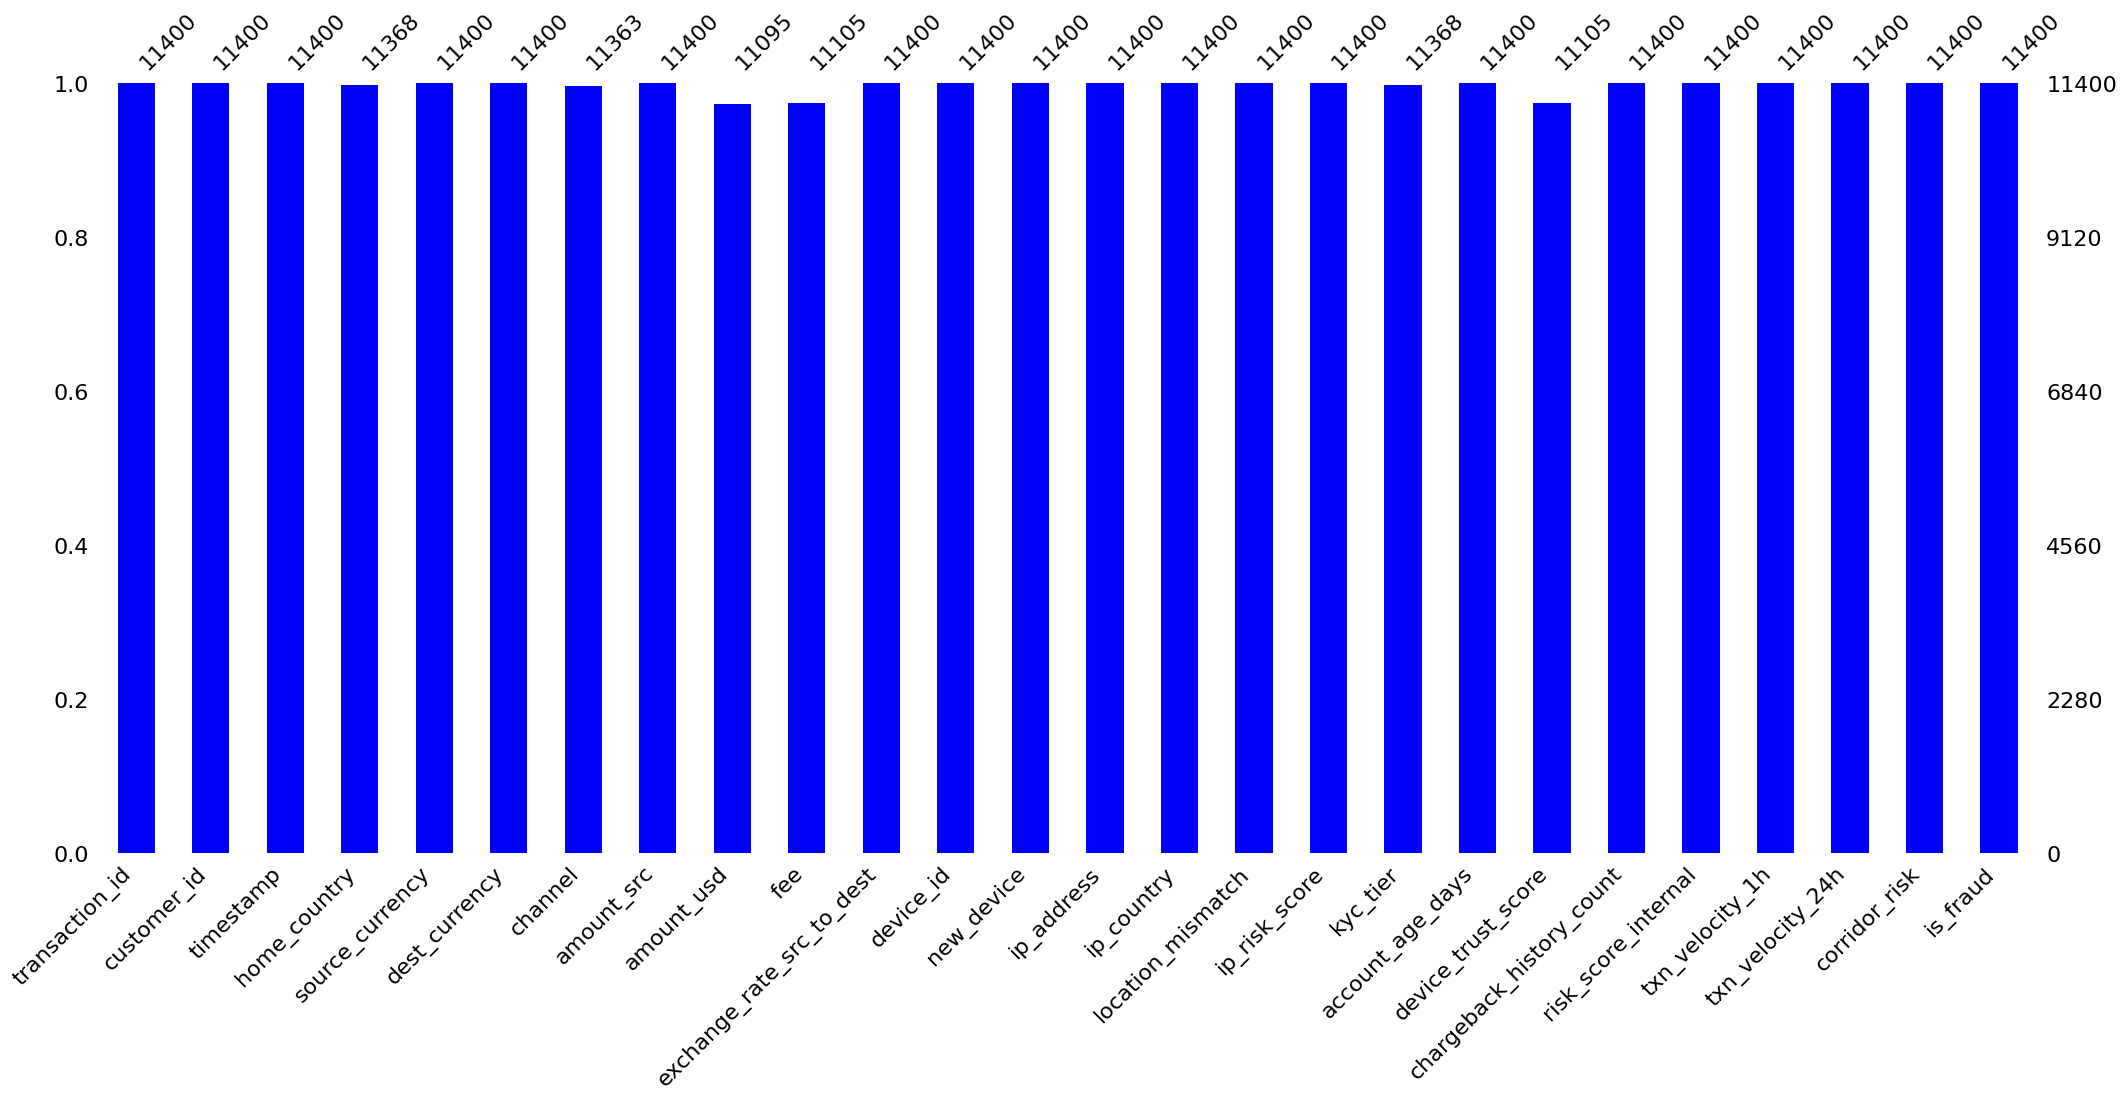

In [97]:
msno.bar(df, color = "Blue")

## The graphics above indicates some features that have missing data

In [98]:
#printing the rows where there are missing data
print(df[df.isnull().any(axis=1)])

                             transaction_id  \
13     1a34a095-3be4-4a69-a22e-803be566526c   
49     b489474c-b729-4759-86e9-51778ddea385   
151    32cbd613-5c6c-4797-be15-165bc408c2ca   
163    8b339135-7446-4689-9bd2-0509f23903f0   
168    c6c7f296-be97-4d18-a93e-719fcba43dce   
...                                     ...   
10082  adc74103-d3b7-491e-a3c9-02aae2050d46   
10093  d5ce08b7-d78f-4e1b-97c0-362cc64e12ee   
10107  8179169f-eea0-4889-923c-cc28c01e5e24   
10142  356a1a21-e76c-4ad6-b712-405d3ad215e6   
10162  ddb073fa-05d9-45b0-90bf-7336b7ef67ff   

                                customer_id                         timestamp  \
13     7041b9c1-3719-4ca8-9a6b-811b47cea6c0  2022-10-05 07:04:39.468549+00:00   
49     402cccc9-28de-45b3-9af7-cc5302aa1f93  2022-10-08 20:45:48.468549+00:00   
151    af8ca4c4-8703-4c55-b66c-2b76cd70040d  2022-10-20 22:08:59.468549+00:00   
163    67c2c6b3-ef0a-4777-a3f1-c84a851bb6ad  2022-10-22 01:51:23.468549+00:00   
168    6d0d9b27-fa26-45f8-93b1

# We are going to drop all the rows that contain missing values. Dropping only 334 will not significantly affect the outcome of our analysis.

In [99]:
# Dropping the rows with missing values
N_df = df.dropna()

# We are going to confirm if the rows were actually dropped

In [100]:
print(N_df.isnull().sum())

transaction_id               0
customer_id                  0
timestamp                    0
home_country                 0
source_currency              0
dest_currency                0
channel                      0
amount_src                   0
amount_usd                   0
fee                          0
exchange_rate_src_to_dest    0
device_id                    0
new_device                   0
ip_address                   0
ip_country                   0
location_mismatch            0
ip_risk_score                0
kyc_tier                     0
account_age_days             0
device_trust_score           0
chargeback_history_count     0
risk_score_internal          0
txn_velocity_1h              0
txn_velocity_24h             0
corridor_risk                0
is_fraud                     0
dtype: int64


# It's clear we no longer have rows with missing values


In [101]:
print(N_df.shape)

(11010, 26)


In [102]:
N_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11010 entries, 0 to 11399
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   transaction_id             11010 non-null  object 
 1   customer_id                11010 non-null  object 
 2   timestamp                  11010 non-null  object 
 3   home_country               11010 non-null  object 
 4   source_currency            11010 non-null  object 
 5   dest_currency              11010 non-null  object 
 6   channel                    11010 non-null  object 
 7   amount_src                 11010 non-null  object 
 8   amount_usd                 11010 non-null  float64
 9   fee                        11010 non-null  float64
 10  exchange_rate_src_to_dest  11010 non-null  float64
 11  device_id                  11010 non-null  object 
 12  new_device                 11010 non-null  bool   
 13  ip_address                 11010 non-null  object 


# Checking for duplicate

In [103]:
df_duplicates = N_df[N_df.duplicated()].sum()
df_duplicates

,0
transaction_id,a5a4d5fc-f8df-4fa9-9ac6-36d3c4e3f1bb88dd45c3-3...
customer_id,7041b9c1-3719-4ca8-9a6b-811b47cea6c0af8ca4c4-8...
timestamp,2024-10-21 18:24:40.468549+00:002023-08-29 10:...
home_country,ukusususususcaususcaususukusukusususususususus...
source_currency,gbpusdusdusdusdusdcadusdusdcadusdusdgbpusdgbpu...
dest_currency,cnygbpusdgbpusdmxneurcadngninrgbpcadngnusdcnyc...
channel,mobilemobilewebatmwebwebatmmobilemobileatmmobi...
amount_src,79.41-320.496.3753.16119.97485.27-272.5970.627...
amount_usd,91448.21
fee,31530.5


In [104]:
dd = N_df.duplicated().sum()
dd

np.int64(194)

In [105]:
len(N_df[N_df.duplicated()])


194

In [106]:
df = N_df.drop_duplicates()
print(f"New DataFrame shape: {df.shape}")
print(f"Number of duplicates removed: {N_df.duplicated().sum()}")

New DataFrame shape: (10816, 26)
Number of duplicates removed: 194


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10816 entries, 0 to 11399
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   transaction_id             10816 non-null  object 
 1   customer_id                10816 non-null  object 
 2   timestamp                  10816 non-null  object 
 3   home_country               10816 non-null  object 
 4   source_currency            10816 non-null  object 
 5   dest_currency              10816 non-null  object 
 6   channel                    10816 non-null  object 
 7   amount_src                 10816 non-null  object 
 8   amount_usd                 10816 non-null  float64
 9   fee                        10816 non-null  float64
 10  exchange_rate_src_to_dest  10816 non-null  float64
 11  device_id                  10816 non-null  object 
 12  new_device                 10816 non-null  bool   
 13  ip_address                 10816 non-null  object 


# some entries of the "amount_src" feature are not clean, having comma inside some figures. Those commas has to be removed.

In [108]:
df['amount_src'] = df['amount_src'].astype(str).str.replace(',', '', regex=False).astype(float)

/tmp/ipython-input-3229616396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['amount_src'] = df['amount_src'].astype(str).str.replace(',', '', regex=False).astype(float)


In [109]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

/tmp/ipython-input-1067626418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10816 entries, 0 to 11399
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   transaction_id             10816 non-null  object             
 1   customer_id                10816 non-null  object             
 2   timestamp                  10757 non-null  datetime64[ns, UTC]
 3   home_country               10816 non-null  object             
 4   source_currency            10816 non-null  object             
 5   dest_currency              10816 non-null  object             
 6   channel                    10816 non-null  object             
 7   amount_src                 10816 non-null  float64            
 8   amount_usd                 10816 non-null  float64            
 9   fee                        10816 non-null  float64            
 10  exchange_rate_src_to_dest  10816 non-null  float64            
 11  device_

## More tasks to carry out
Perform an exploratory data analysis (EDA) on the df DataFrame to identify patterns and indicators of fraudulent transactions. This should include:
- Analyzing the distribution of the 'is_fraud' column.
- Visualizing the distribution of numerical features ('amount_usd', 'fee', 'ip_risk_score', 'device_trust_score', 'account_age_days', 'risk_score_internal', 'txn_velocity_1h', 'txn_velocity_24h'), comparing them between fraudulent and non-fraudulent transactions.
- Analyzing categorical features ('home_country', 'source_currency', 'dest_currency', 'channel', 'kyc_tier', 'ip_country') to understand their frequency and relationship with fraud.
- Conducting time-based analysis by extracting 'hour_of_day', 'day_of_week', 'month', and 'year' from the 'timestamp' column and visualizing transaction volumes and fraud rates over these periods.
- Generating a correlation matrix for numerical features, including 'is_fraud'.
- Identifying top/bottom categories for fraud rates across specified categorical features.
- Investigating the impact of 'new_device' and 'location_mismatch' flags on fraud rates.
- Exploring customer risk profiles based on 'account_age_days', 'chargeback_history_count', and 'kyc_tier'.
 - Finally,we will summarize key findings, patterns, anomalies, and potential indicators of fraud.

## Analyze Fraud Distribution

#Subtask:
We want to examine the distribution of the 'is_fraud' column to understand the proportion of fraudulent transactions in the dataset. This will provide an initial overview of the target variable.

**Reasoning**:
To understand the distribution of fraudulent and non-fraudulent transactions, we will first calculate the value counts of the 'is_fraud' column, then print these counts, and finally visualize them using a countplot to clearly show the proportions.



Distribution of 'is_fraud' column:
is_fraud
0    9830
1     986
Name: count, dtype: int64


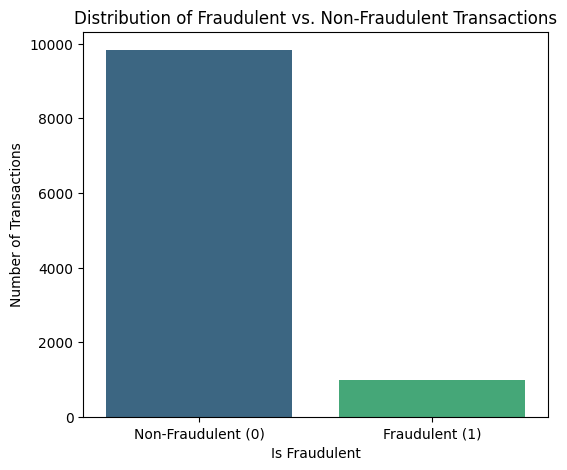

In [111]:
fraud_distribution = df['is_fraud'].value_counts()
print("Distribution of 'is_fraud' column:")
print(fraud_distribution)

plt.figure(figsize=(6, 5))
sns.countplot(x='is_fraud', data=df, palette='viridis', hue='is_fraud', legend=False)
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Is Fraudulent')
plt.ylabel('Number of Transactions')
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent (0)', 'Fraudulent (1)'])
plt.show()

## Categorical Feature Analysis

### Subtask:
Create bar plots or count plots for categorical features like 'home_country', 'source_currency', 'dest_currency', 'channel', 'kyc_tier', and 'ip_country' to see the frequency of each category. Investigate how these categories relate to fraud by cross-tabulating them with the 'is_fraud' column.


**Reasoning**:
To analyze the distribution and fraud rates for each categorical feature, I will iterate through the specified columns, creating a count plot for frequency and a bar plot for fraud rate per category.



/tmp/ipython-input-3020028990.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis', ax=axes[0], order=df[feature].value_counts().index)
/tmp/ipython-input-3020028990.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_rate.index, y=fraud_rate.values, palette='magma', ax=axes[1])


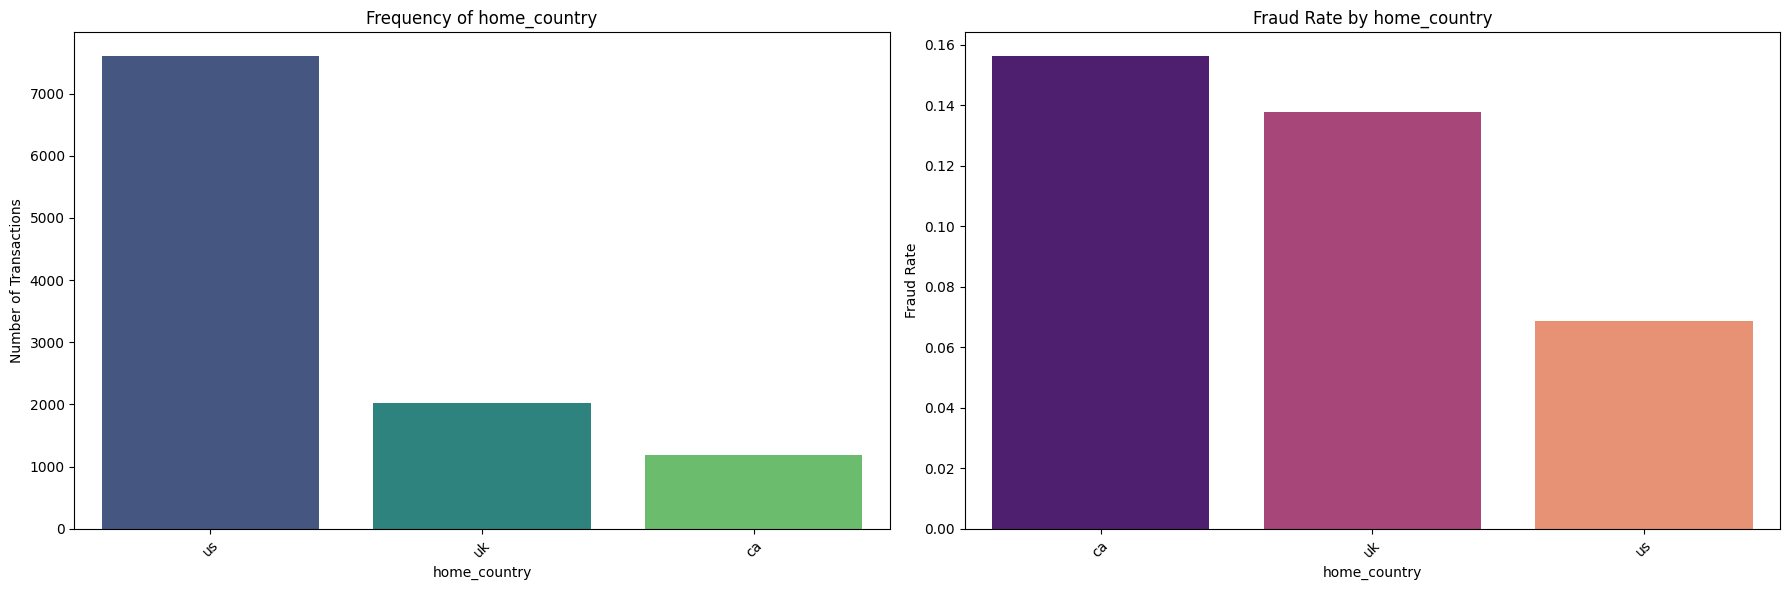

/tmp/ipython-input-3020028990.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis', ax=axes[0], order=df[feature].value_counts().index)
/tmp/ipython-input-3020028990.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_rate.index, y=fraud_rate.values, palette='magma', ax=axes[1])


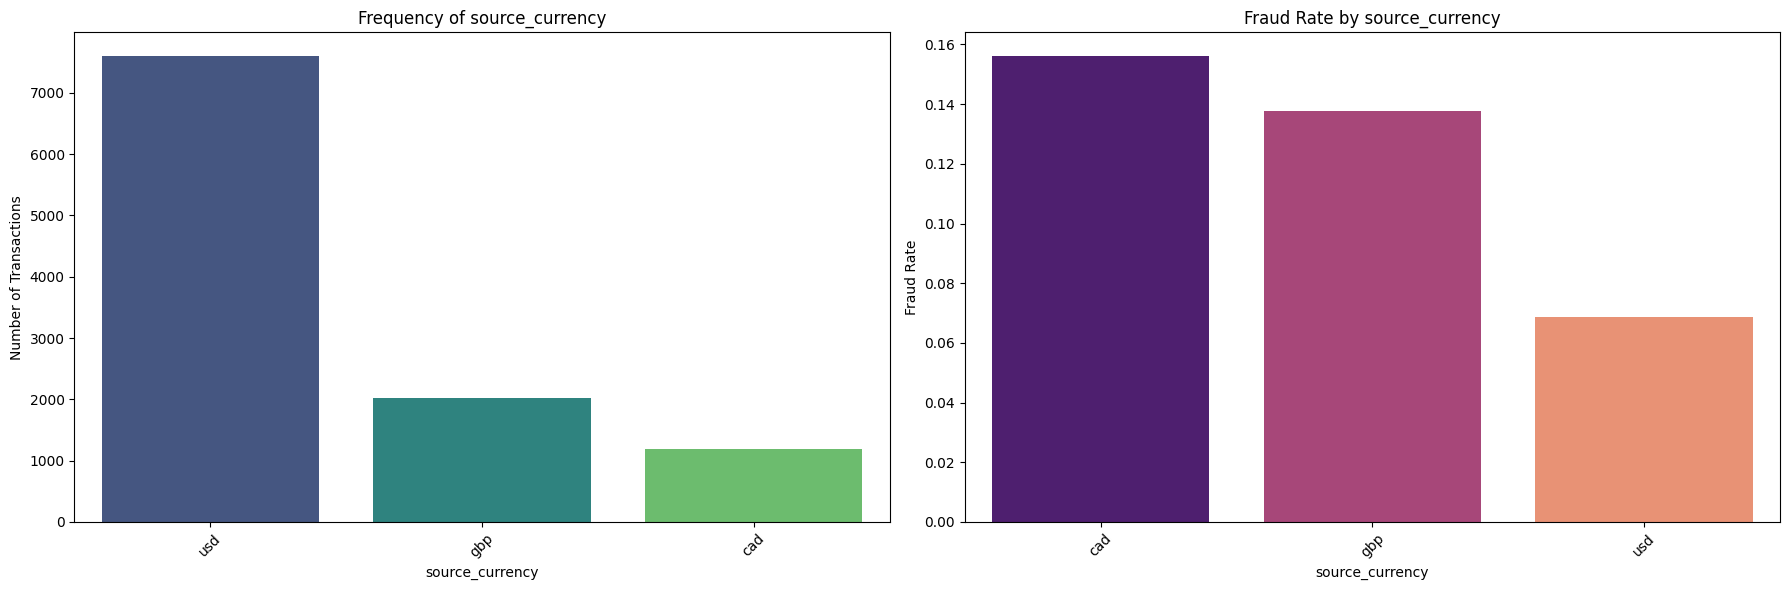

/tmp/ipython-input-3020028990.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis', ax=axes[0], order=df[feature].value_counts().index)
/tmp/ipython-input-3020028990.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_rate.index, y=fraud_rate.values, palette='magma', ax=axes[1])


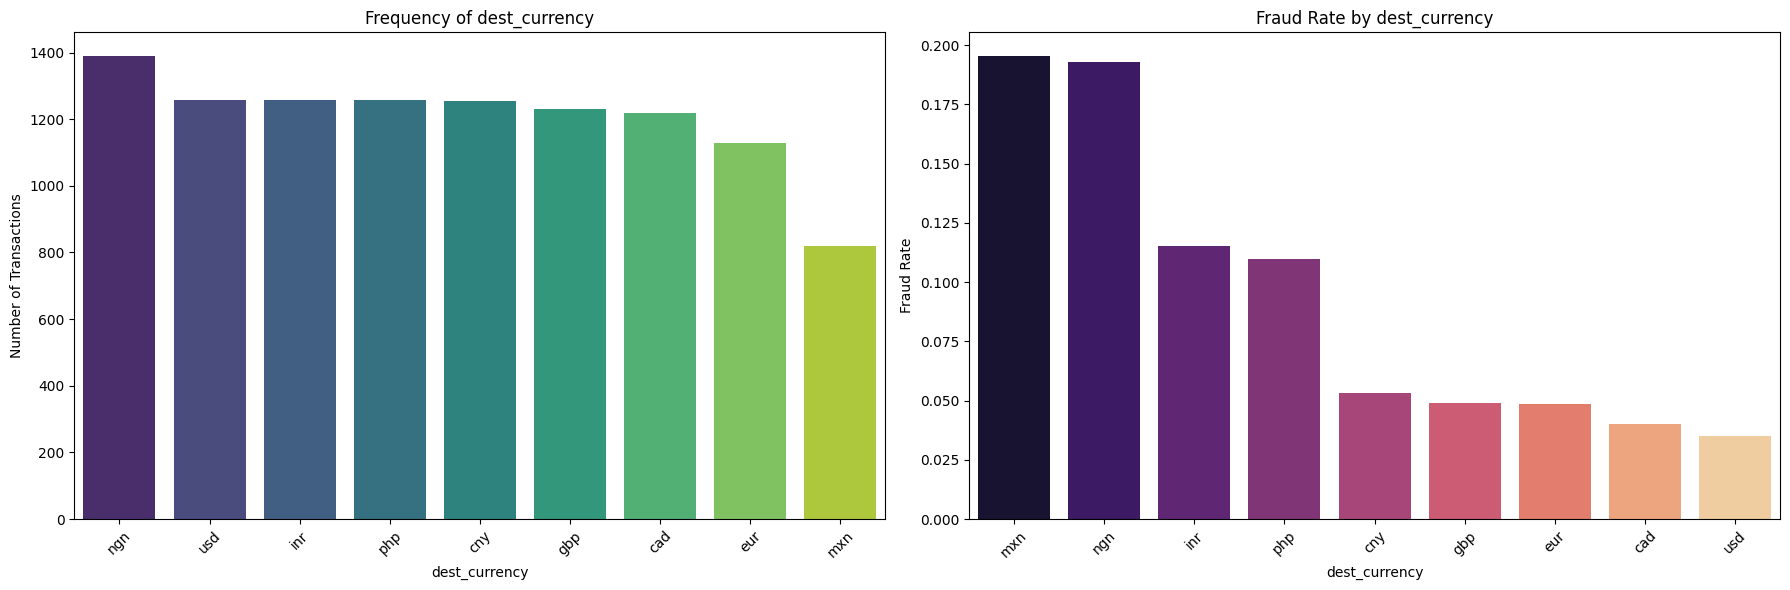

/tmp/ipython-input-3020028990.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis', ax=axes[0], order=df[feature].value_counts().index)
/tmp/ipython-input-3020028990.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_rate.index, y=fraud_rate.values, palette='magma', ax=axes[1])


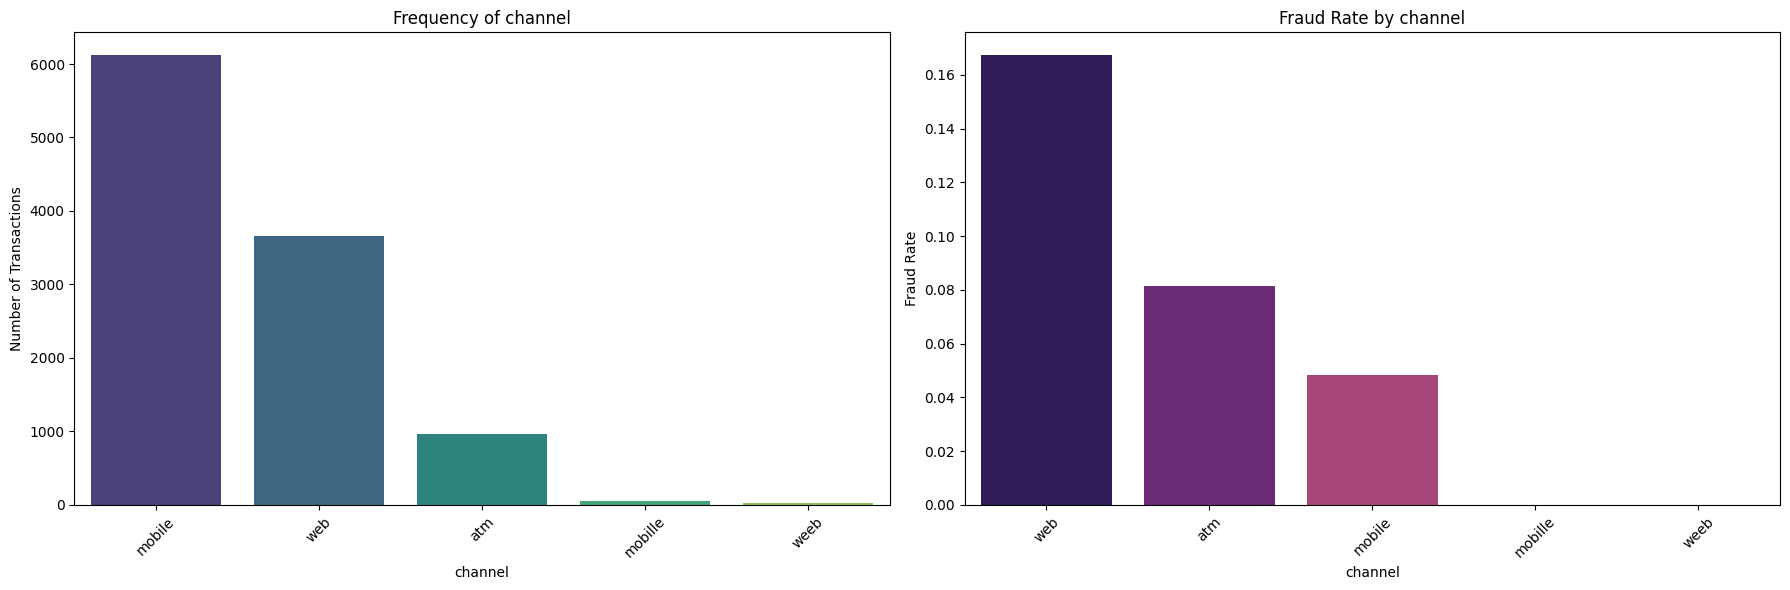

/tmp/ipython-input-3020028990.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis', ax=axes[0], order=df[feature].value_counts().index)
/tmp/ipython-input-3020028990.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_rate.index, y=fraud_rate.values, palette='magma', ax=axes[1])


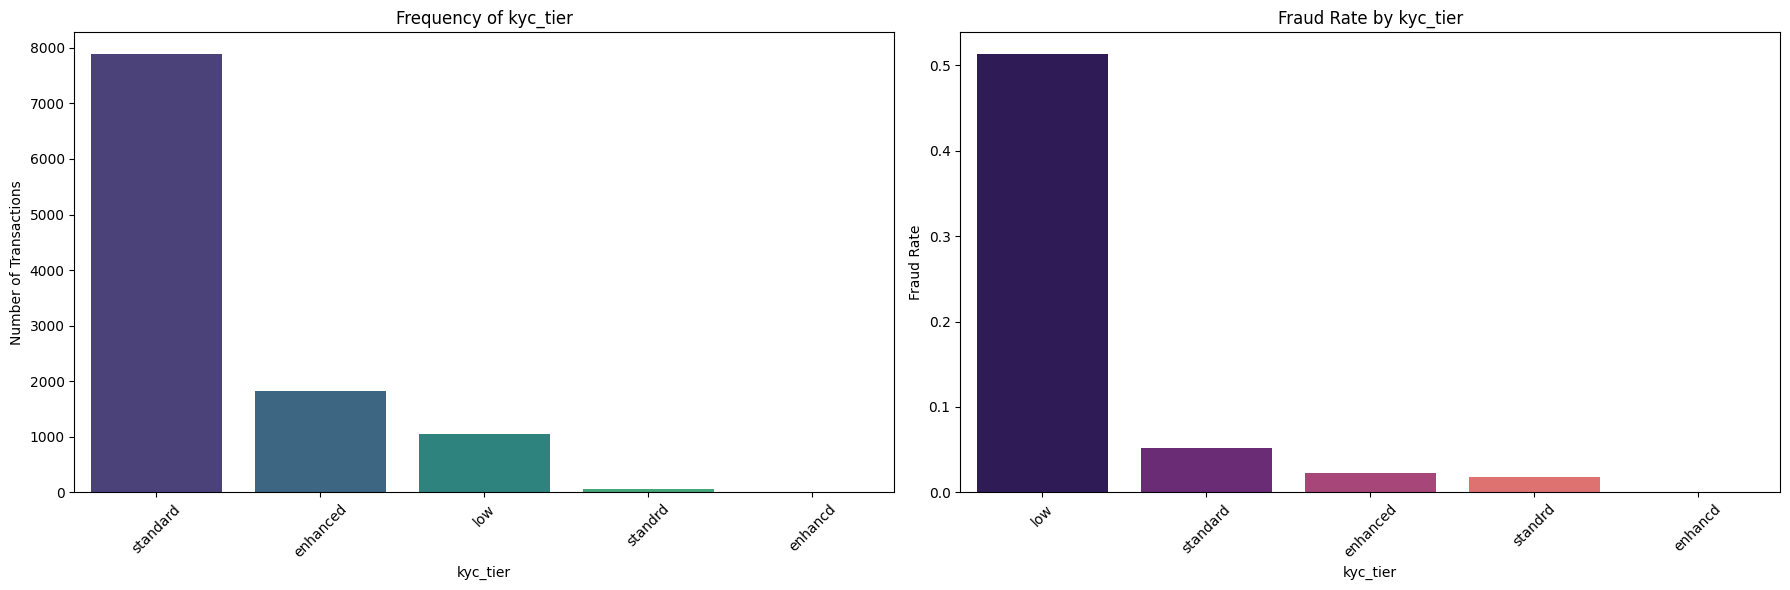

/tmp/ipython-input-3020028990.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis', ax=axes[0], order=df[feature].value_counts().index)
/tmp/ipython-input-3020028990.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_rate.index, y=fraud_rate.values, palette='magma', ax=axes[1])


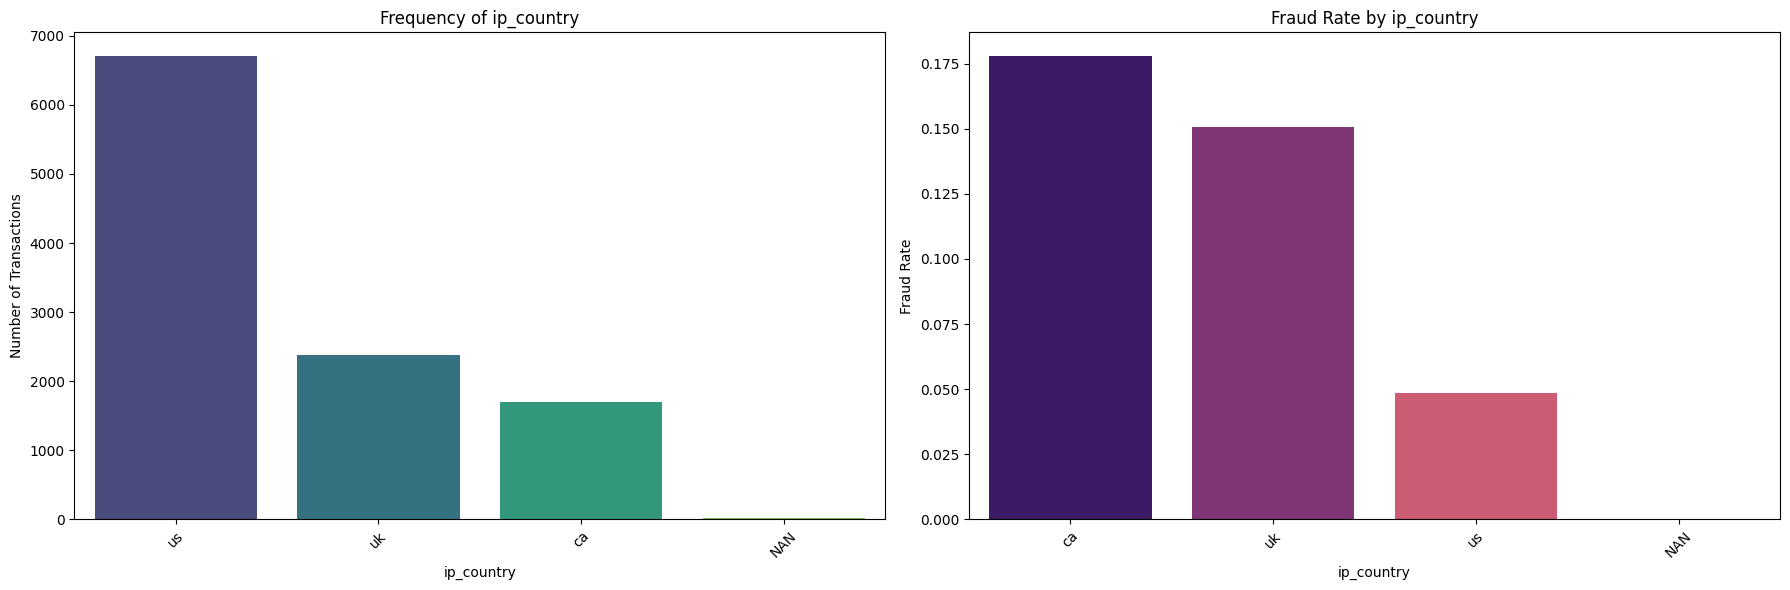

In [112]:
#import matplotlib.pyplot as plt
#import seaborn as sns

categorical_features = ['home_country', 'source_currency', 'dest_currency', 'channel', 'kyc_tier', 'ip_country']

for feature in categorical_features:
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # Count plot for feature frequency
    sns.countplot(x=feature, data=df, palette='viridis', ax=axes[0], order=df[feature].value_counts().index)
    axes[0].set_title(f'Frequency of {feature}')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Number of Transactions')
    axes[0].tick_params(axis='x', rotation=45)

    # Calculate fraud rate for each category
    fraud_rate = df.groupby(feature)['is_fraud'].mean().sort_values(ascending=False)

    # Bar plot for fraud rate by category
    sns.barplot(x=fraud_rate.index, y=fraud_rate.values, palette='magma', ax=axes[1])
    axes[1].set_title(f'Fraud Rate by {feature}')
    axes[1].set_xlabel(feature)
    axes[1].set_ylabel('Fraud Rate')
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

/tmp/ipython-input-3489765394.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_rate.index, y=fraud_rate.values, palette='coolwarm')


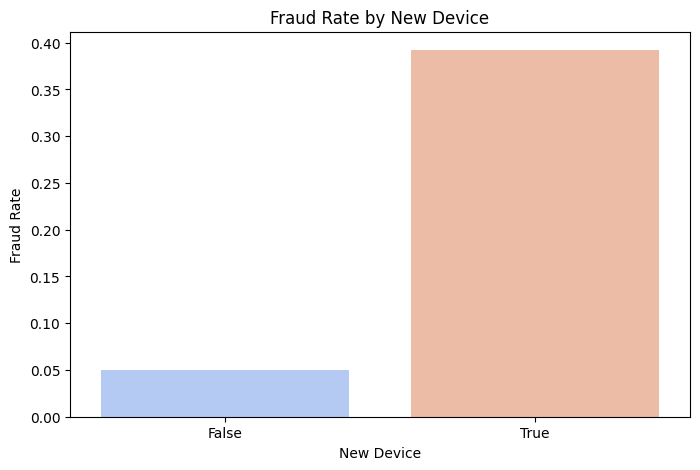

/tmp/ipython-input-3489765394.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_rate.index, y=fraud_rate.values, palette='coolwarm')


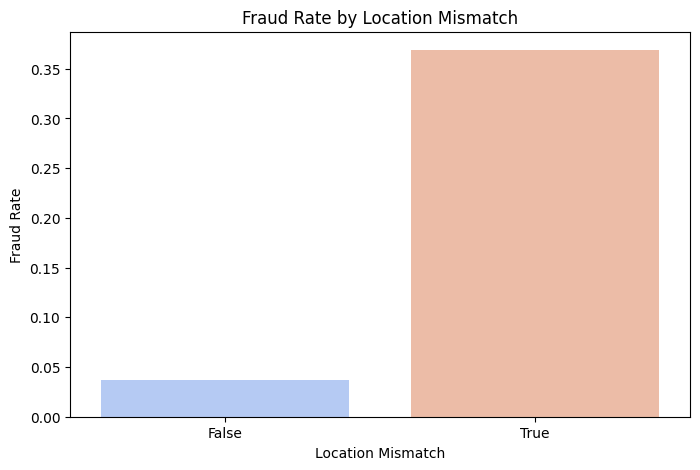

In [113]:
flag_features = ['new_device', 'location_mismatch']

for feature in flag_features:
    plt.figure(figsize=(8, 5))
    fraud_rate = df.groupby(feature)['is_fraud'].mean().sort_values(ascending=False)
    sns.barplot(x=fraud_rate.index, y=fraud_rate.values, palette='coolwarm')
    plt.title(f'Fraud Rate by {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Fraud Rate')
    plt.xticks(ticks=[0, 1], labels=['False', 'True'])
    plt.show()

## SUMMARY OF THE FINDINGS OF THE CATEGORICAL FEATURES PLOTED


1. the most frequently used currency and country where transactions are initiated are USD and the US respectively. While the less frequently used currency and transaction origin are CAD and Canada respectively.
However, the same Canada that has the least number of transaction originating from there and CAD that appears as the least used currency both account for the highest number of fraudulent transaction.

2. Mexico (MXN) is the destination with the least number of transaction but happens to be the destination with highest fraud rate.

3. The most used channel for transaction is the Mobile but the highest fraud rate happens via the web.

4. Customer with standard kyc_tier the onestha transact the most but those customers with Low kyc_tier happen to be more fraudulent as shown in the fraud rate by kyc_tiers graph.

5. Similarly to number 1 above, ip_country with the most transaction count is the US but the one with highest fraud rate is the Canada.
6. Location mismatch and whether the device is new or old is a strong indicator of fraud and will be very relivant to our predictive model.

**NEXT**:
Now that the categorical feature analysis is complete, the next step in the EDA is to conduct time-based analysis. wWe will extract 'hour_of_day', 'day_of_week', 'Is_Weekend?' 'month', and 'year' from the 'timestamp' column and then visualize transaction volumes and fraud rates over these periods using count plots and bar plots.



In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10816 entries, 0 to 11399
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   transaction_id             10816 non-null  object             
 1   customer_id                10816 non-null  object             
 2   timestamp                  10757 non-null  datetime64[ns, UTC]
 3   home_country               10816 non-null  object             
 4   source_currency            10816 non-null  object             
 5   dest_currency              10816 non-null  object             
 6   channel                    10816 non-null  object             
 7   amount_src                 10816 non-null  float64            
 8   amount_usd                 10816 non-null  float64            
 9   fee                        10816 non-null  float64            
 10  exchange_rate_src_to_dest  10816 non-null  float64            
 11  device_

/tmp/ipython-input-1530955927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour_of_day'] = df['timestamp'].dt.hour
/tmp/ipython-input-1530955927.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df['timestamp'].dt.dayofweek
/tmp/ipython-input-1530955927.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

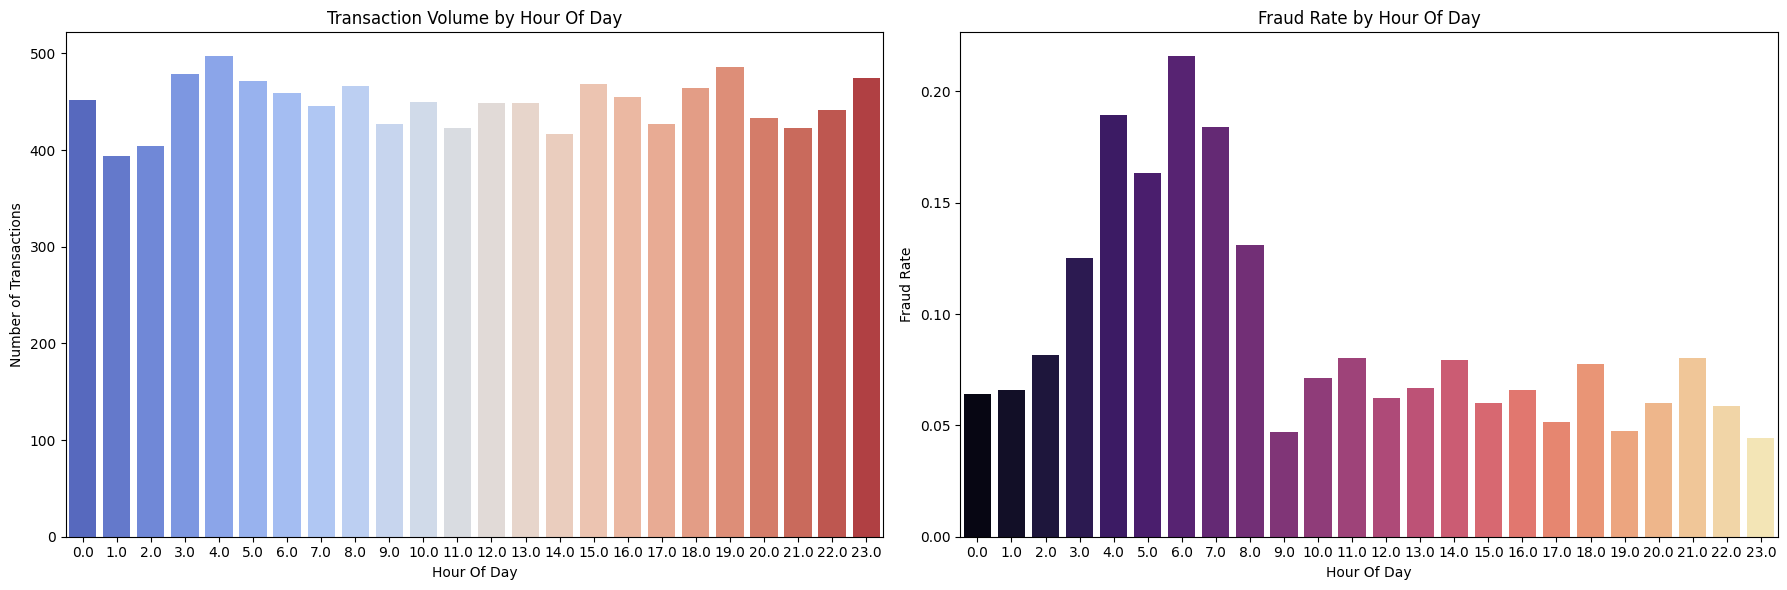

/tmp/ipython-input-1530955927.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='coolwarm', ax=axes[0])
/tmp/ipython-input-1530955927.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_rate.index, y=fraud_rate.values, palette='magma', ax=axes[1])


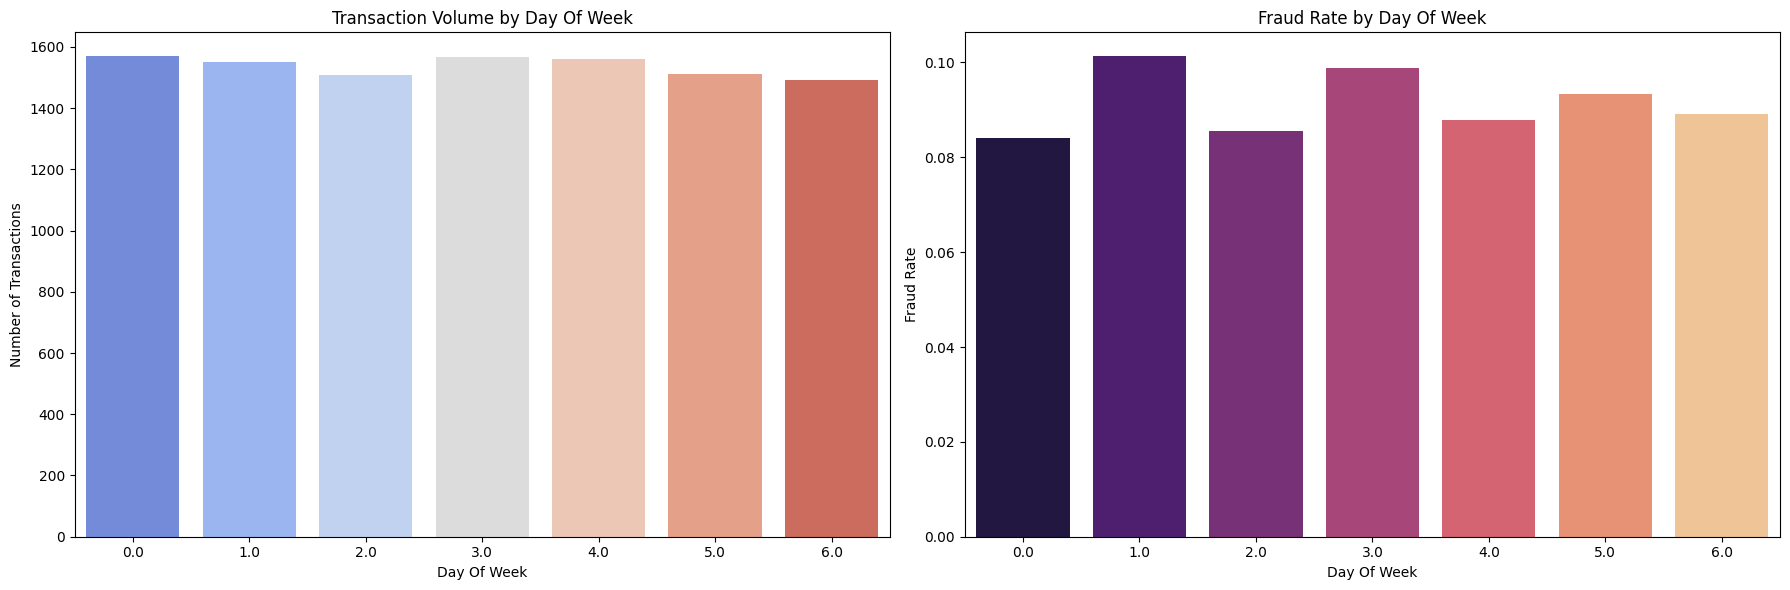

/tmp/ipython-input-1530955927.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='coolwarm', ax=axes[0])
/tmp/ipython-input-1530955927.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_rate.index, y=fraud_rate.values, palette='magma', ax=axes[1])


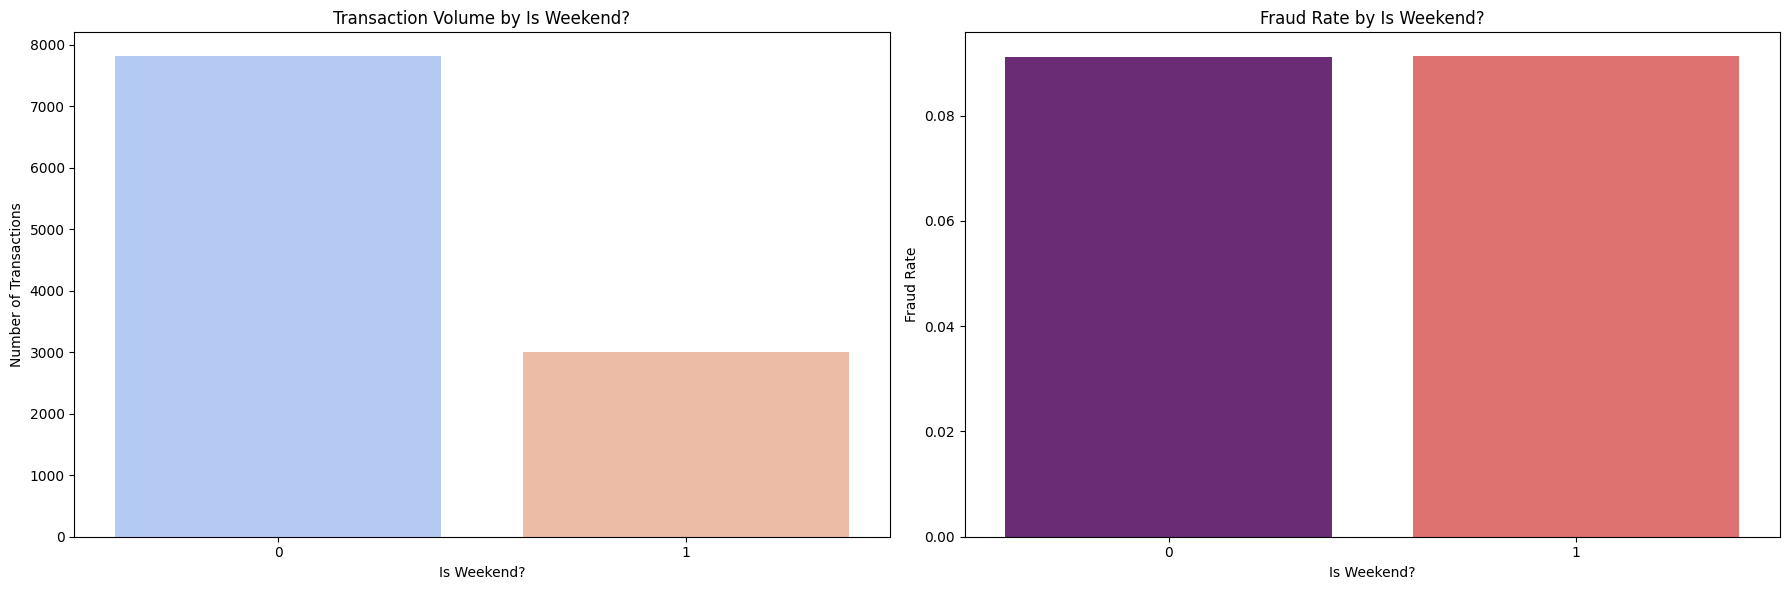

/tmp/ipython-input-1530955927.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='coolwarm', ax=axes[0])
/tmp/ipython-input-1530955927.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_rate.index, y=fraud_rate.values, palette='magma', ax=axes[1])


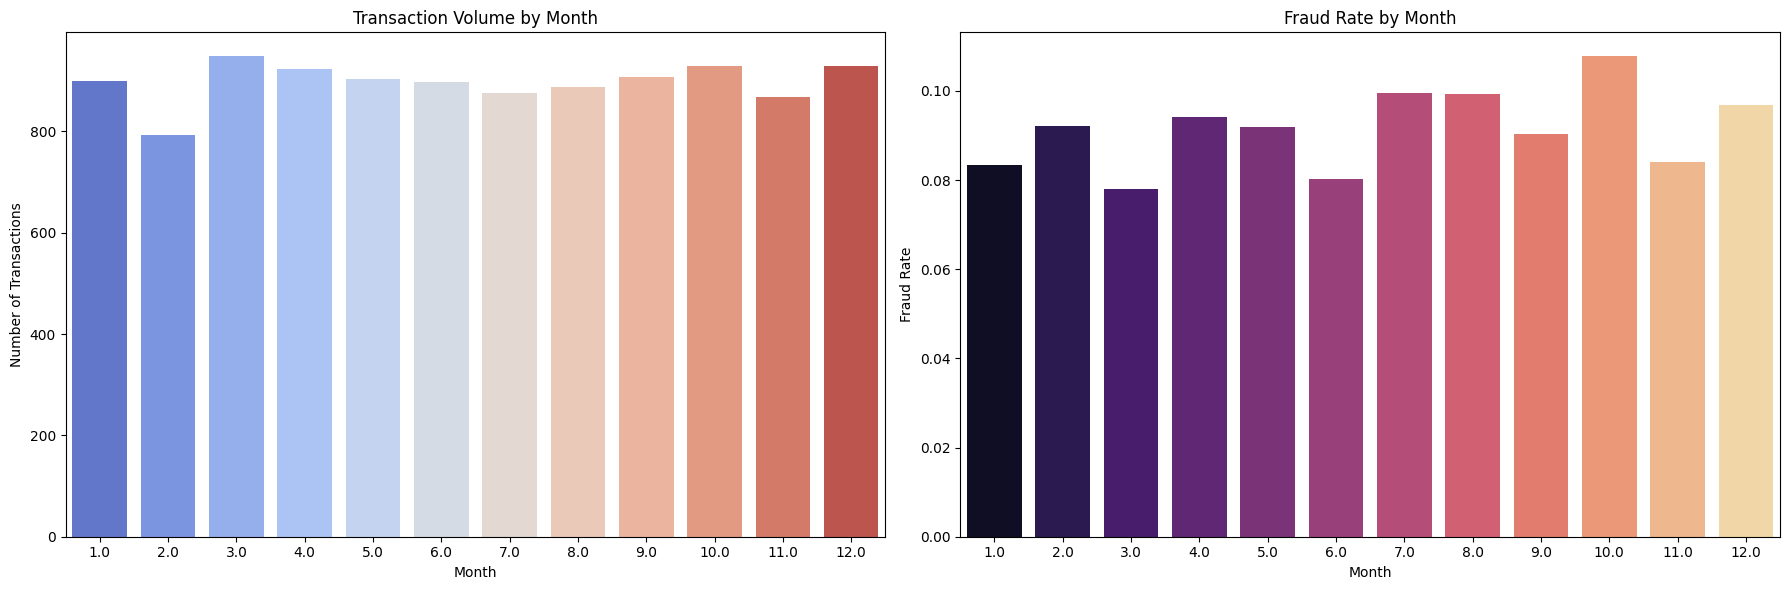

/tmp/ipython-input-1530955927.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='coolwarm', ax=axes[0])
/tmp/ipython-input-1530955927.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_rate.index, y=fraud_rate.values, palette='magma', ax=axes[1])


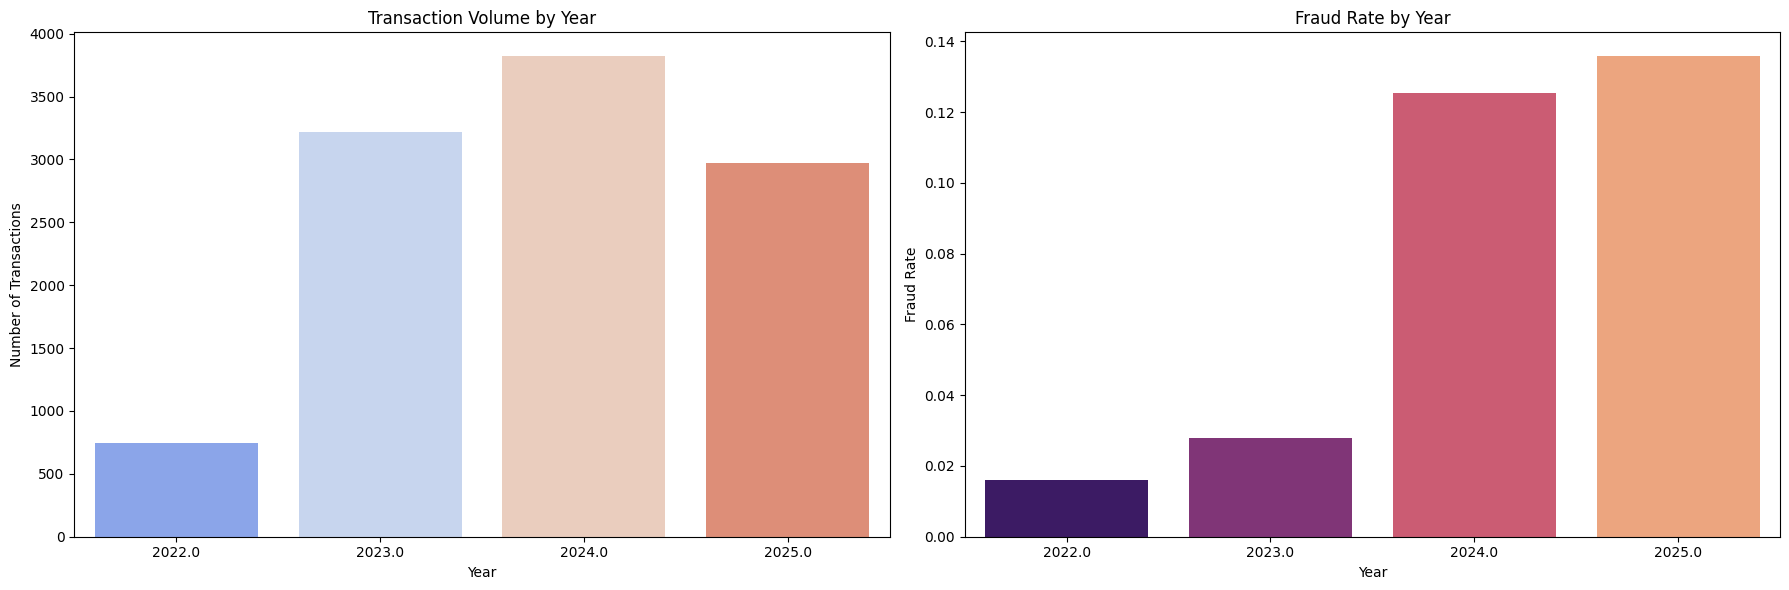

In [115]:
df['hour_of_day'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['Is_Weekend?']= df['day_of_week'].apply(lambda x: 1 if x>=5 else 0)
df['month'] = df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year

time_features = ['hour_of_day', 'day_of_week','Is_Weekend?', 'month', 'year']

for feature in time_features:
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # Count plot for transaction volume
    sns.countplot(x=feature, data=df, palette='coolwarm', ax=axes[0])
    axes[0].set_title(f'Transaction Volume by {feature.replace("_", " ").title()}')
    axes[0].set_xlabel(feature.replace("_", " ").title())
    axes[0].set_ylabel('Number of Transactions')

    # Bar plot for fraud rate
    fraud_rate = df.groupby(feature)['is_fraud'].mean().sort_index()
    sns.barplot(x=fraud_rate.index, y=fraud_rate.values, palette='magma', ax=axes[1])
    axes[1].set_title(f'Fraud Rate by {feature.replace("_", " ").title()}')
    axes[1].set_xlabel(feature.replace("_", " ").title())
    axes[1].set_ylabel('Fraud Rate')

    plt.tight_layout()
    plt.show()

#Observation
The Month of the year doesn't significantly affect our analysis. However, it was observed that the volume of transaction in each year from 2022-2024 is directly proportional while only 2025 is inversely proportional.

In [116]:
df['account_age_days'].describe()

,account_age_days
count,10816.000000
mean,392.244453
std,341.949566
min,1.000000
25%,147.000000
50%,272.000000
75%,661.000000
max,1095.000000


###FEATURE ENGINEERING:
###inning the account age into groups for deeper analysis

In [117]:
df['account_age_group'] = pd.cut(df['account_age_days'],
                          bins=[0, 30, 90, 180, 365, 2000],
                          labels=['<=30', '31-90', '91-180', '181-365', '>365'])

/tmp/ipython-input-3851701869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['account_age_group'] = pd.cut(df['account_age_days'],


/tmp/ipython-input-3914204488.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate_by_age = df.groupby('account_age_group')['is_fraud'].mean().sort_values(ascending=False)
/tmp/ipython-input-3914204488.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_rate_by_age.index, y=fraud_rate_by_age.values, palette='viridis')


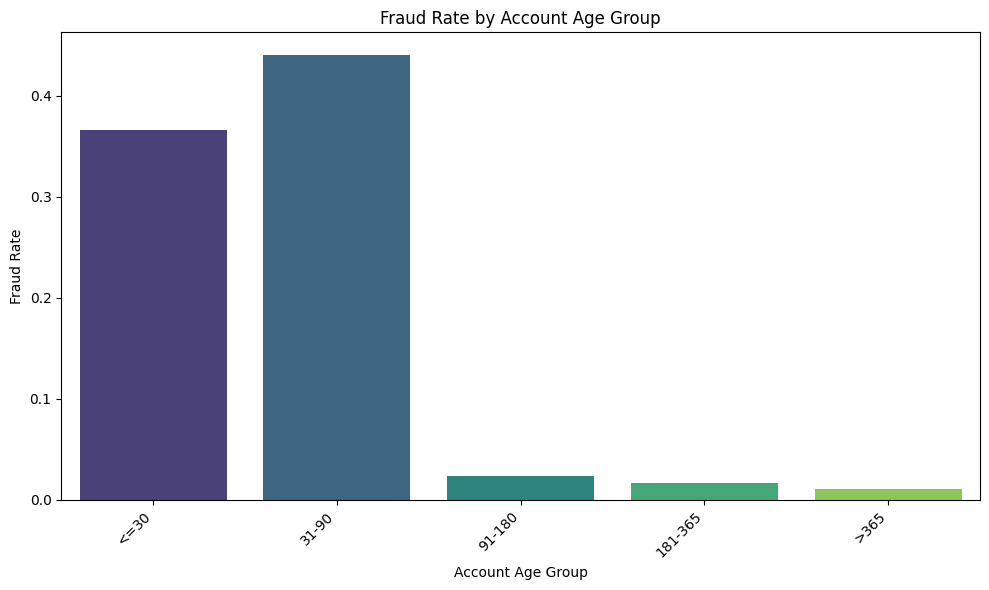

In [118]:
plt.figure(figsize=(10, 6))
fraud_rate_by_age = df.groupby('account_age_group')['is_fraud'].mean().sort_values(ascending=False)
sns.barplot(x=fraud_rate_by_age.index, y=fraud_rate_by_age.values, palette='viridis')
plt.title('Fraud Rate by Account Age Group')
plt.xlabel('Account Age Group')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## OBSERVATION:
###We see clearly that mos fraudulent transactions occur with account that were recently opened; expecially those that were less than or equal to 90 days old. This is a good feature to be considered for our analysis.

In [119]:
df['account_age_group'].describe()

,account_age_group
count,10816
unique,5
top,>365
freq,4087


txn_velocity_1h
 4    0.838843
 3    0.832700
 5    0.813830
 6    0.708333
 7    0.702703
 8    0.477273
-1    0.021053
 0    0.017842
 1    0.000000
 2    0.000000
Name: is_fraud, dtype: float64


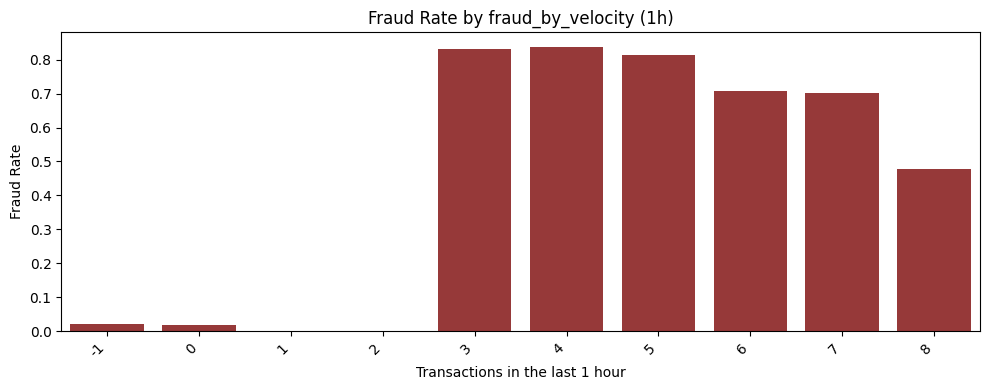

In [120]:
#Fraud rate by transaction Velocity(1h) i.e.number of transaction completed in an hour
fraud_by_velocity = df.groupby('txn_velocity_1h')['is_fraud'].mean().sort_values(ascending=False)
print(fraud_by_velocity)

plt.figure(figsize=(10, 4))
fraud_by_velocity = df.groupby('txn_velocity_1h')['is_fraud'].mean().sort_values(ascending=False)
sns.barplot(x=fraud_by_velocity.index, y=fraud_by_velocity.values, color ='Brown')
plt.title('Fraud Rate by fraud_by_velocity (1h)')
plt.xlabel('Transactions in the last 1 hour')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# When a particular customer perform so many transactions in 1 hour, there is higher likelihood of fraud as indicated by the above bar chart.

##Similar to how we bin the account age feature, we shall bin the amount of transaction and compare it with the corresponding fraud rate.

amount_bucket
$2,000-$5,000    0.943820
$1,000-$2,000    0.679389
$500-$1,000      0.296526
>$5,000          0.140909
$100-$500        0.061838
<=$100           0.018880
Name: is_fraud, dtype: float64


/tmp/ipython-input-4269640116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["amount_bucket"] = pd.cut(df["amount_usd"],
/tmp/ipython-input-4269640116.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_amount = df.groupby('amount_bucket')['is_fraud'].mean().sort_values(ascending=False)


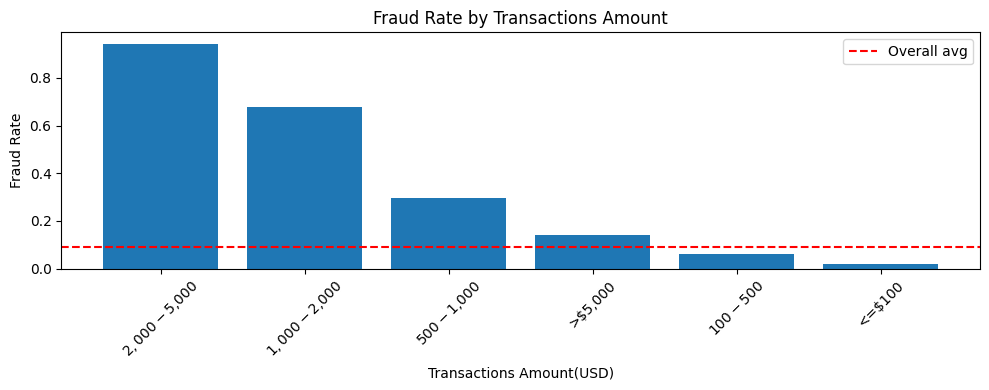

In [121]:
#fraud rate by amount buckets
df["amount_bucket"] = pd.cut(df["amount_usd"],
                          bins=[0, 100, 500, 1000, 2000, 5000, 20000],
                          labels=['<=$100','$100-$500', '$500-$1,000', '$1,000-$2,000', '$2,000-$5,000', '>$5,000'])

fraud_by_amount = df.groupby('amount_bucket')['is_fraud'].mean().sort_values(ascending=False)
print(fraud_by_amount)


plt.figure(figsize=(10, 4))
#amount_bucket = df.groupby('amount_bucket')['is_fraud'].mean().sort_values(ascending=False)
plt.bar(range(len(fraud_by_amount)), fraud_by_amount.values)
plt.xticks(range(len(fraud_by_amount)), fraud_by_amount.index, rotation=45)
plt.title('Fraud Rate by Transactions Amount')
plt.xlabel('Transactions Amount(USD)')
plt.ylabel('Fraud Rate')
plt.axhline(y=df['is_fraud'].mean(), color='r', linestyle='--',label='Overall avg')
plt.legend()
plt.tight_layout()
plt.show()

## The amount involved in the transaction also affect the fraud rate. From the above graph, transactions amount between $2k - $5k have the highest fraud rate followed by amounts between $1k-$2k

## Similarly, we are going to bin the Ip_score into categories



In [122]:
df.columns

Index(['transaction_id', 'customer_id', 'timestamp', 'home_country',
       'source_currency', 'dest_currency', 'channel', 'amount_src',
       'amount_usd', 'fee', 'exchange_rate_src_to_dest', 'device_id',
       'new_device', 'ip_address', 'ip_country', 'location_mismatch',
       'ip_risk_score', 'kyc_tier', 'account_age_days', 'device_trust_score',
       'chargeback_history_count', 'risk_score_internal', 'txn_velocity_1h',
       'txn_velocity_24h', 'corridor_risk', 'is_fraud', 'hour_of_day',
       'day_of_week', 'Is_Weekend?', 'month', 'year', 'account_age_group',
       'amount_bucket'],
      dtype='object')

## We are going to continue with our feature engineeering

In [123]:
df['ip_risk_score'].describe()

,ip_risk_score
count,10816.000000
mean,0.398746
std,0.272099
min,0.004000
25%,0.209000
50%,0.326000
75%,0.490000
max,1.200000


ip_risk_score_bucket
>0.8       0.547887
0.7-0.8    0.201493
0.5-0.7    0.029808
0.3-0.5    0.022492
<0.3       0.015280
Name: is_fraud, dtype: float64


/tmp/ipython-input-2901717519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ip_risk_score_bucket"] = pd.cut(df["ip_risk_score"],
/tmp/ipython-input-2901717519.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_ip_risk = df.groupby('ip_risk_score_bucket')['is_fraud'].mean().sort_values(ascending=False)


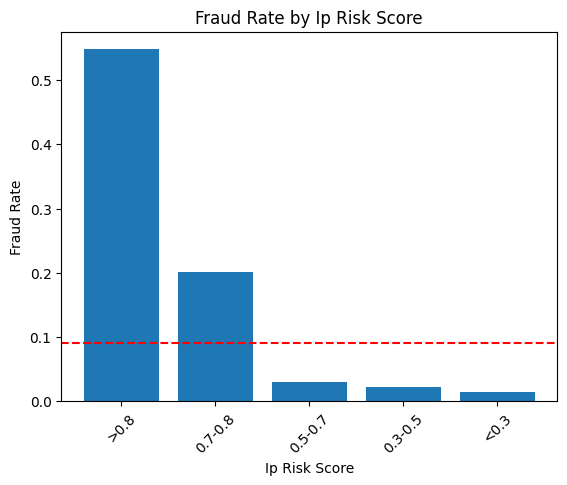

In [124]:
#Fraud rate by Ip risk score bucket
df["ip_risk_score_bucket"] = pd.cut(df["ip_risk_score"],
                          bins=[0, 0.3, 0.5, 0.7,0.8, 1.2],
                         labels = ['<0.3', '0.3-0.5', '0.5-0.7', '0.7-0.8', '>0.8'])
fraud_by_ip_risk = df.groupby('ip_risk_score_bucket')['is_fraud'].mean().sort_values(ascending=False)
print(fraud_by_ip_risk)

plt.bar(range(len(fraud_by_ip_risk)), fraud_by_ip_risk.values)
plt.xticks(range(len(fraud_by_ip_risk)), fraud_by_ip_risk.index, rotation=45)
plt.title('Fraud Rate by Ip Risk Score')
plt.xlabel('Ip Risk Score')
plt.ylabel('Fraud Rate')
plt.axhline(y=df['is_fraud'].mean(), color='r', linestyle='--',label='Overall avg')

#Observation:

## As expected, the group with the ip_risk_score>0.8 has the highest tendency of fraudulent transaction. This feature will be very significant to our model prediction's accuracy as well.

In [125]:
df["device_trust_score"].describe()

,device_trust_score
count,10816.000000
mean,0.653516
std,0.272621
min,-0.100000
25%,0.515000
50%,0.654500
75%,0.894000
max,0.999000


device_trust_score_bucket


/tmp/ipython-input-1981336488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["device_trust_score_bucket"] = pd.cut(df["device_trust_score"],
/tmp/ipython-input-1981336488.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_device_trust_score = df.groupby('device_trust_score_bucket')['is_fraud'].mean().sort_values(ascending=False)


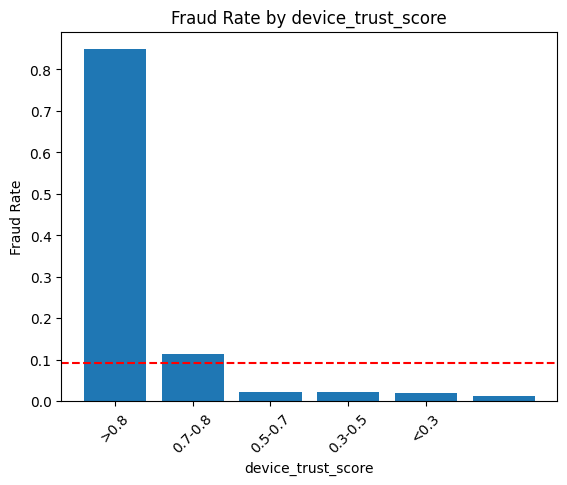

In [126]:
#Fraud rate by device_trust_score_bucket
df["device_trust_score_bucket"] = pd.cut(df["device_trust_score"],
                          bins=[-1, 0, 0.3,  0.5, 0.7, 0.85, 1.0],
                         labels = ['<0', '0-0.3', '0.3-0.5', '0.5-0.7', '0.7-0.85', '>0.85'])
fraud_by_device_trust_score = df.groupby('device_trust_score_bucket')['is_fraud'].mean().sort_values(ascending=False)
print('device_trust_score_bucket')

plt.bar(range(len(fraud_by_device_trust_score)), fraud_by_device_trust_score.values)
plt.xticks(range(len(fraud_by_ip_risk)), fraud_by_ip_risk.index, rotation=45)
plt.title('Fraud Rate by device_trust_score')
plt.xlabel('device_trust_score')
plt.ylabel('Fraud Rate')
plt.axhline(y=df['is_fraud'].mean(), color='r', linestyle='--',label='Overall avg')

#Observation:

##Interestingly, only the device_trust_score_groups of 0.7 and above tend to have a significant effect on our target label.

#TASK

##We are going to bring together all the features we have engineered, assign a "1" to the groups/bukets that can impact our target variable and assign a "0" to those groups/bukets that do not really impact our target variable.

# E.g:
## night_hour = "1" if transaction between 3-8am and else "0";
##account_very_new = "1" if account <30 days,  else "0" ;
##account_new = "1" if account  is 30-90 days,  else "0";
##velocity_burst = "1" if > 3transactions in the last 1 hour;
##amount_high = "1" if transaction amount > = $2,000;
##ip_high_risk = "1" if ip_score >= 0.7;
##device_low_trust = "1" if device_trust_sccore is <5;

In [127]:
## Based on our analysis, created threashold-based features
df["night_hour"] = ((df['hour_of_day'] >=3) & (df['hour_of_day'] <=8)).astype(int)
df["account_very_new"] = (df['account_age_days'] < 30).astype(int)
df["account_new"] = ((df['account_age_days'] >= 30) & (df['account_age_days'] <= 90)).astype(int)
df["velocity_burst"] = (df['txn_velocity_1h'] >= 3).astype(int)
df["amount_high"] = (df['amount_usd'] >= 2000).astype(int)
df["ip_high_risk"] = (df['ip_risk_score'] >= 0.7).astype(int)
df["device_low_trust"] = (df['device_trust_score'] < 0.5).astype(int)

print("Features created:")
print(df[["night_hour", "account_very_new", "account_new", "velocity_burst", "amount_high", "ip_high_risk","device_low_trust"]].describe())



Features created:
         night_hour  account_very_new   account_new  velocity_burst  \
count  10816.000000      10816.000000  10816.000000    10816.000000   
mean       0.260632          0.170026      0.039386        0.098003   
std        0.439000          0.375673      0.194521        0.297332   
min        0.000000          0.000000      0.000000        0.000000   
25%        0.000000          0.000000      0.000000        0.000000   
50%        0.000000          0.000000      0.000000        0.000000   
75%        1.000000          0.000000      0.000000        0.000000   
max        1.000000          1.000000      1.000000        1.000000   

        amount_high  ip_high_risk  device_low_trust  
count  10816.000000  10816.000000      10816.000000  
mean       0.028569      0.143953          0.245747  
std        0.166599      0.351059          0.430549  
min        0.000000      0.000000          0.000000  
25%        0.000000      0.000000          0.000000  
50%        0.00000

/tmp/ipython-input-4290055443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["night_hour"] = ((df['hour_of_day'] >=3) & (df['hour_of_day'] <=8)).astype(int)
/tmp/ipython-input-4290055443.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["account_very_new"] = (df['account_age_days'] < 30).astype(int)
/tmp/ipython-input-4290055443.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [128]:
# Dropping temporarybucket column and slecting final features
df = df.drop(columns=["account_age_group","amount_bucket","ip_risk_score_bucket","device_trust_score_bucket"],axis=1)


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10816 entries, 0 to 11399
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   transaction_id             10816 non-null  object             
 1   customer_id                10816 non-null  object             
 2   timestamp                  10757 non-null  datetime64[ns, UTC]
 3   home_country               10816 non-null  object             
 4   source_currency            10816 non-null  object             
 5   dest_currency              10816 non-null  object             
 6   channel                    10816 non-null  object             
 7   amount_src                 10816 non-null  float64            
 8   amount_usd                 10816 non-null  float64            
 9   fee                        10816 non-null  float64            
 10  exchange_rate_src_to_dest  10816 non-null  float64            
 11  device_

In [130]:
categorical_features = ['channel','kyc_tier','home_country', 'ip_country', 'source_currency', 'dest_currency', 'new_device','location_mismatch',]
numerical_features =['amount_src', 'amount_usd', 'amount_high', 'fee','ip_risk_score','device_trust_score','account_age_days','txn_velocity_1h',
                     'txn_velocity_24h','corridor_risk','day_of_week', 'Is_Weekend?', 'risk_score_internal', 'account_very_new', 'account_new', 'velocity_burst',
                     'ip_high_risk', 'device_low_trust', 'night_hour']
all_features = categorical_features + numerical_features
print(all_features)
print(f'all_features: {len(all_features)}')
print(categorical_features)
print(f'Categorical features: {len(categorical_features)}')
print(numerical_features)
print(f'numerical_features:: {len(numerical_features)}')
print(f'Dataframe shape: {df.shape}')



['channel', 'kyc_tier', 'home_country', 'ip_country', 'source_currency', 'dest_currency', 'new_device', 'location_mismatch', 'amount_src', 'amount_usd', 'amount_high', 'fee', 'ip_risk_score', 'device_trust_score', 'account_age_days', 'txn_velocity_1h', 'txn_velocity_24h', 'corridor_risk', 'day_of_week', 'Is_Weekend?', 'risk_score_internal', 'account_very_new', 'account_new', 'velocity_burst', 'ip_high_risk', 'device_low_trust', 'night_hour']
all_features: 27
['channel', 'kyc_tier', 'home_country', 'ip_country', 'source_currency', 'dest_currency', 'new_device', 'location_mismatch']
Categorical features: 8
['amount_src', 'amount_usd', 'amount_high', 'fee', 'ip_risk_score', 'device_trust_score', 'account_age_days', 'txn_velocity_1h', 'txn_velocity_24h', 'corridor_risk', 'day_of_week', 'Is_Weekend?', 'risk_score_internal', 'account_very_new', 'account_new', 'velocity_burst', 'ip_high_risk', 'device_low_trust', 'night_hour']
numerical_features:: 19
Dataframe shape: (10816, 38)


In [131]:

df.columns

Index(['transaction_id', 'customer_id', 'timestamp', 'home_country',
       'source_currency', 'dest_currency', 'channel', 'amount_src',
       'amount_usd', 'fee', 'exchange_rate_src_to_dest', 'device_id',
       'new_device', 'ip_address', 'ip_country', 'location_mismatch',
       'ip_risk_score', 'kyc_tier', 'account_age_days', 'device_trust_score',
       'chargeback_history_count', 'risk_score_internal', 'txn_velocity_1h',
       'txn_velocity_24h', 'corridor_risk', 'is_fraud', 'hour_of_day',
       'day_of_week', 'Is_Weekend?', 'month', 'year', 'night_hour',
       'account_very_new', 'account_new', 'velocity_burst', 'amount_high',
       'ip_high_risk', 'device_low_trust'],
      dtype='object')

# MODELLING

#What this code do



*   Sort the DataFrame chronologically by timestamp to avoid data leakage
*   Split the dataset into 80% and 20% for training and test set respectively, based on time order.
* print the number of row, fraud counts,  and fraud rates for both splits
*   separate the feature matrix- (x_train, x_test) from target labels (y_train, y_test)


*   show the shape of all the resulting datasets to confirm that everything is in order







In [132]:
df = df.sort_values('timestamp').reset_index(drop=True)

#80/20 time-based split
split_idx = int(0.8 * len(df))
train_df = df.iloc[:split_idx].copy()
test_df = df.iloc[split_idx:].copy()

print(f'train_df shape: {train_df.shape}')
print(f'test_df shape: {test_df.shape}')
#print(f"Train: (len{(train_df)} rows ({train_df['is_fraud'].sum()} fraud,{train_df['is_fraud'].mean():.3f} rate)")
#print(f"Test: (len{(test_df)} rows ({test_df['is_fraud'].sum()} fraud,{test_df['is_fraud'].mean():.3f} rate)")


#prpare X and Y
x_train = train_df[all_features]
y_train = train_df['is_fraud']
x_test = test_df[all_features]
y_test = test_df['is_fraud']

print(f"\nX_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {x_test.shape}", f"y_test shape: {y_test.shape}")


train_df shape: (8652, 38)
test_df shape: (2164, 38)

X_train shape: (8652, 27), y_train shape: (8652,)
X_test shape: (2164, 27) y_test shape: (2164,)


###What this code do:

1.   Applies One-Hot Encoder to categorical features (dropping the first category to avoid dommy variable)
2.   Applies standard scaling to numeric features so they have mean = 0 and varians =1
3.   fits this proccessing pipeline on the training set (X_train) andtransform both train and test set
4.   Prints the new transformed shape showing how many features were created after encoding





In [133]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Build preproccessing pipeline
processor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown = 'ignore'),
         categorical_features),
        ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())]), numerical_features),
    ])

#Fit on train, transform both
x_train_processed = processor.fit_transform(x_train)
x_test_processed = processor.transform(x_test)

print(f"x_train_processed shape: {x_train_processed.shape}")
print(f"x_test_processed shape: {x_test_processed.shape}")
print(f"original features: {len(all_features)}, After encoding : {x_train_processed.shape[1]}")

x_train_processed shape: (8652, 44)
x_test_processed shape: (2164, 44)
original features: 27, After encoding : 44


In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_recall_curve, roc_auc_score, confusion_matrix

#Train logistic Regression with balanced class weights
logreg_model = LogisticRegression(class_weight='balanced',max_iter =1000, random_state =42)
logreg_model.fit(x_train_processed, y_train)

#Predict on test
y_pred_logreg = logreg_model.predict(x_test_processed)
y_proba_lr = logreg_model.predict_proba(x_test_processed)[:, 1]

#Evaluate
print("Logistic Regression Results:")
#print(classification_report(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg, target_names=['Legit','Fraud']))

Logistic Regression Results:
              precision    recall  f1-score   support

       Legit       0.99      0.95      0.97      1862
       Fraud       0.76      0.95      0.85       302

    accuracy                           0.95      2164
   macro avg       0.88      0.95      0.91      2164
weighted avg       0.96      0.95      0.95      2164



In [135]:
from sklearn.ensemble import RandomForestClassifier
#Train random Forest with balanced class weights
rf_model = RandomForestClassifier(
    n_estimators = 100,
    class_weight='balanced',
    max_depth =10,
    random_state=42,
    n_jobs =1
    )
rf_model.fit(x_train_processed, y_train)

#Predict on test
y_pred_rf = rf_model.predict(x_test_processed)
y_proba_rf = rf_model.predict_proba(x_test_processed)[:, 1]

#Evaluation
print("Random Forest Results:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Legit','Fraud']))
print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_proba_rf):.4f}")


Random Forest Results:

Confusion Matrix:
[[1861    1]
 [  25  277]]

Classification Report:
              precision    recall  f1-score   support

       Legit       0.99      1.00      0.99      1862
       Fraud       1.00      0.92      0.96       302

    accuracy                           0.99      2164
   macro avg       0.99      0.96      0.97      2164
weighted avg       0.99      0.99      0.99      2164


ROC-AUC Score: 0.9776


In [136]:
from xgboost import XGBClassifier
#Calculate scale_pos_weight for imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

#Train XGBoost with balanced class weights
xgb_model = XGBClassifier(
    n_estimators = 100,
    max_depth = 6,
    learning_rate = 0.1,
    scale_pos_weight = scale_pos_weight,
    random_state = 42,
    eval_metric = 'logloss'
)

xgb_model.fit(x_train_processed, y_train)

#Predict on test
y_pred_xgb = xgb_model.predict(x_test_processed)
y_proba_xgb = xgb_model.predict_proba(x_test_processed)[:, 1]

#Evaluation
print("XGBoost Results:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['Legit','Fraud']))
print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_proba_xgb):.4f}")

#Predict on test
y_pred_xgb = xgb_model.predict(x_test_processed)
y_proba_xgb = xgb_model

XGBoost Results:

Confusion Matrix:
[[1838   24]
 [  24  278]]

Classification Report:
              precision    recall  f1-score   support

       Legit       0.99      0.99      0.99      1862
       Fraud       0.92      0.92      0.92       302

    accuracy                           0.98      2164
   macro avg       0.95      0.95      0.95      2164
weighted avg       0.98      0.98      0.98      2164


ROC-AUC Score: 0.9732


In [137]:
#Experimenting with Light GBM
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(
    n_estimators = 100,
    max_depth = 6,
    learning_rate = 0.1,
    class_weight = 'balanced',
    random_state = 42,
    verbosity =-1
)

lgbm_model.fit(x_train_processed, y_train)

#Predict on test
y_pred_lgbm = lgbm_model.predict(x_test_processed)
y_proba_lgbm = lgbm_model.predict_proba(x_test_processed)[:, 1]

#Evaluation
print("LightGBM Results:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgbm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgbm, target_names=['Legit','Fraud']))
print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_proba_lgbm):.4f}")


LightGBM Results:

Confusion Matrix:
[[1835   27]
 [  23  279]]

Classification Report:
              precision    recall  f1-score   support

       Legit       0.99      0.99      0.99      1862
       Fraud       0.91      0.92      0.92       302

    accuracy                           0.98      2164
   macro avg       0.95      0.95      0.95      2164
weighted avg       0.98      0.98      0.98      2164


ROC-AUC Score: 0.9722


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


##Now we want to apply some hyper parameter tunning  to the random forest mode that presented the best performanceout of the models we experiment with to see if we can improve on the result already accheived

##What this code does
   
*   Print message, including that hyper-parameter tunning has started
*   Define a parameter search space (para_dist) for random forest including:
    *   tree count (n_esttimators), depth, split rules,leaf size,and feature selection strategy.
*   Uses RandomizedSearchCV to sample 20 random combinations from the parameter space:
      *   3-fold cross validation(cv=3)
      *   optimized for F1-score
      *   Runs in parallel(n_jobs = 1)

*   Fits the ttuning process on the preproccessed training data
*  Print the best parameters found and their corresponding best F1 cross-validation scores


      





In [138]:
from sklearn.model_selection import RandomizedSearchCV

print("Starting Random Forest Hyperparameter Tuning ...\n")
#Parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt','log2'],
    'class_weight': ['balanced']
}

#Random searchCV
rf_tuned = RandomizedSearchCV(RandomForestClassifier(random_state =42),
                              param_distributions = param_dist,
                              n_iter =25,
                              cv =3,
                              scoring = 'f1',
                              n_jobs = -1,
                              random_state = 42,
                              verbose =1
)

rf_tuned.fit(x_train_processed,y_train)

print(f"\nBest Parameters:")
for param, value in rf_tuned.best_params_.items():
  print(f"  {param}:{value}")

print(f"\nBest CV F1-score:{rf_tuned.best_score_:.4f}")

Starting Random Forest Hyperparameter Tuning ...

Fitting 3 folds for each of 25 candidates, totalling 75 fits

Best Parameters:
  n_estimators:200
  min_samples_split:2
  min_samples_leaf:1
  max_features:log2
  max_depth:None
  class_weight:balanced

Best CV F1-score:0.8564


In [139]:
#Evaluate tuned parameter model on test set
y_pred_tuned = rf_tuned.predict(x_test_processed)
y_probab_tuned = rf_tuned.predict_proba(x_test_processed)[:,1]

#print("="'60)
print("TUNED Random Forest Results:")
#print("."'60)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred_tuned))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned,
                            target_names=['Legit','Fraud']))



TUNED Random Forest Results:

Confusion Matrix:
[[1862    0]
 [  25  277]]

Classification Report:
              precision    recall  f1-score   support

       Legit       0.99      1.00      0.99      1862
       Fraud       1.00      0.92      0.96       302

    accuracy                           0.99      2164
   macro avg       0.99      0.96      0.98      2164
weighted avg       0.99      0.99      0.99      2164



##From the result of our hyperparameter tuning, the RandomSearchCV randomly combine the parameters given in the param_dist lists in search of the the set that produces the best performance. It is clear here that the best reults for our target variable- Fraud (precision = 100% aand Recall= 92%) is the same as the base result of the Random Forest model, and couldn't be improved upon by the Hyperparameter tuning. This result is good enough.

##Precision = 100% means that there were no false detection. All the cases identified as fraudulent were actually true.

## Recall = 92% means 92 out of 100 cases of fraudulent transaction were flagged while only 8% escaped.

##From business perspective, the higher the recall value, the less loss incured byt the business. Hence, in order to minimize losses, focus is usually on the recall than other metrics in cases like fraud detections.

##SHAP
###The next step in our analysis is to use a tool cal SHAP to explain our results and findings.



##Key ideas:
*   It assigns each feature a fair contribution value for a prediction
*   Works with many model types(tree models, deep learning models,linear models, etc.)
*   It produces visualization that help understand global and local model behaviour






##Imprting SHAP and checking version

In [140]:
import shap
print(f"SHAP version:{shap.__version__}")

SHAP version:0.50.0


##SHAP Explainer for a Random Forest
###This code set up and uses SHAP to interpret a trained Random Forest model.
##What it does:

*   Create a SHAP TreeExplainer For our Traineed Random Forest Model (rf_model)
*   Uses the Explainer tpo compute SHAP values for the first 100 rows of our proccessed test data(x_test_processed[:100] to loop things fas
*   print the shape of the SHAP values arrays so we cansee how many sample, features (and possiblt classes) are included.
*   Printt a short confirmation message indicating that the SHAP explaineris ready to interpret the Random Forest Model





In [148]:
#Create SHAP explainer for Random Forest
explainer_rf = shap.TreeExplainer(rf_model)
#Calculate SHAP values for test set (sample 150 for speed)
shap_value_rf = explainer_rf.shap_values(x_test_processed[:150])

print(f"SHAP values  shape:{shap_value_rf.shape}")
print("Explainer ready for Random Forest")

SHAP values  shape:(150, 44, 2)
Explainer ready for Random Forest


##Getting Features names after Preprocessing
###This codes collect the final feature names produced by the preprocessing pipeline so they match the columns seen by the model
       

 ### What it does:

*   ### Retrieves the One-hot encoded categorical features names from the('cat') transformer using get_feature_names_out(categorical_features)
*   ### Uses numeric features directly as the list of numeric features names
*   ### Concatenate the categorical and numeric names into a single list (all_features_names), preserving the order used in the preprocessed data
*   ### Prints:
    *  #### the total number of feature after encoding, and
    *  #### the first 10 feature as a quick sanity check tha encoding worked as expected
     







In [142]:
# Get features names after encoding
cat_features = processor.named_transformers_['cat'].get_feature_names_out(categorical_features) # Use get_feature_names() for older sklearn versions
num_features = numerical_features
all_features_names = list(cat_features) + num_features

print(f"Total features after encoding:{len(all_features_names)}")
print(f"First 10 features: {all_features_names[:10]}")

Total features after encoding:44
First 10 features: ['channel_mobile', 'channel_mobille', 'channel_web', 'channel_weeb', 'kyc_tier_enhanced', 'kyc_tier_low', 'kyc_tier_standard', 'kyc_tier_standrd', 'home_country_uk', 'home_country_us']


#Interpreting SHAP values for the Fraud Classs
*   ### Selects SHAP values for the fraud class1 from shap_values_rf and stores them in shap_value_fraud
*   Compute the mean absolute SHAP value per feature, giving a measure of each feature's overall impact on fraud predictions
*   Build a DataFrame (feature_importance) with:
    *   feature: feature names from all_all_feature_names
    *   importance: corresponding mean SHAP impact
*   Sort feaure by importance (descending) and print the top 15 most important features driving the fraud class predictions









In [143]:
# Now 'shap_value_rf' contains the SHAP values for the sample of the test set
# It has shape (n_samples, n_features, n_classes)

# Select SHAP values for the fraud class (class 1) for all samples
shap_values_for_fraud_class = shap_value_rf[:, :, 1]

# Calculate mean absolute SHAP values for the fraud class
mean_shap = np.abs(shap_values_for_fraud_class).mean(axis=0)

# Create feature importance DataFrame
# 'all_features_names' is expected to be defined from cell 'RzXZEasw4vDN'
feature_importance = pd.DataFrame({
    'feature': all_features_names,
    'importance': mean_shap
}).sort_values(by='importance', ascending=False)

# Print top 15 most important features
print("\nTop 15 most important features:")
print(feature_importance.head(15).to_string(index = False))


Top 15 most important features:
               feature  importance
       txn_velocity_1h    0.053567
        velocity_burst    0.048593
         ip_risk_score    0.047388
      txn_velocity_24h    0.045917
   risk_score_internal    0.045636
      account_age_days    0.036189
    device_trust_score    0.024760
      account_very_new    0.023898
            amount_src    0.022080
          ip_high_risk    0.021420
      device_low_trust    0.020954
            amount_usd    0.015506
                   fee    0.013239
location_mismatch_True    0.009034
          kyc_tier_low    0.008482


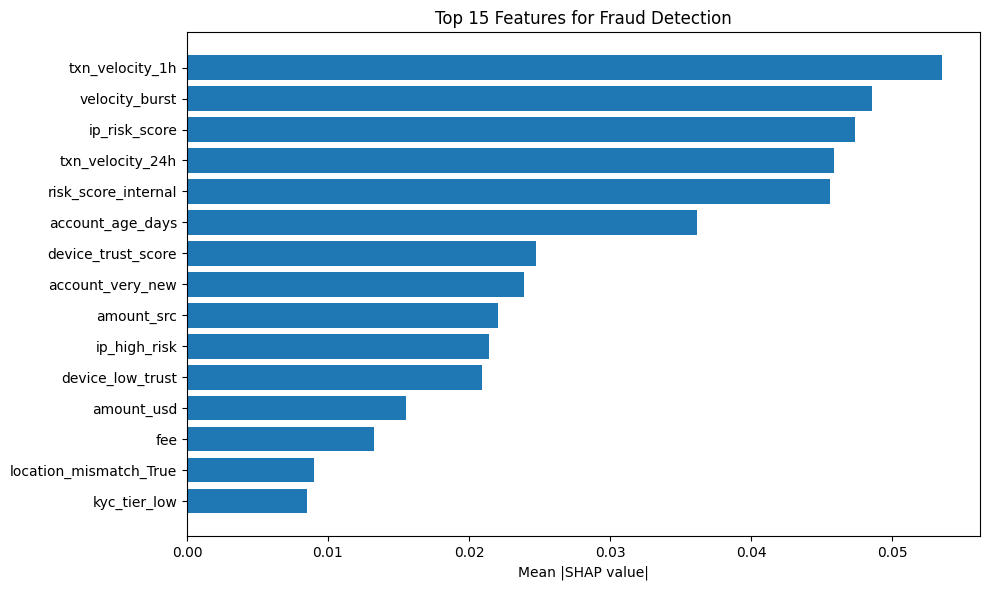

In [144]:
#Showing the top 15 most important features in a bar chart
top_15 = feature_importance.head(15)
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_15)),top_15['importance'])
plt.yticks(range(len(top_15)),top_15['feature'])
plt.xlabel('Mean |SHAP value|')
plt.title("Top 15 Features for Fraud Detection")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#Explain_transaction Function (Summary)
*   Explain a single test transaction usin the model and its SHAP values
*   Determines:
    *   the true label (FRAUD/LEGITIMATE)
    *  The predicted label and the fraud probability from the model
 *   Extract this sample feature values and SHAP values
*   Rank features by theabsolute size of their SHAP value(strongest impact first)
*   Build:
    *   Top risk factors: features that increase fraud risk (possible SHAP values)
      *   Top protective factors: features that reduces fraud risk (ngative SHAP values)
  *   return a formatted human-readable text explanation summarizing why the model judges a particular transaction fraudulent or legitimate





In [150]:
def explain_transaction(idx,model, shap_values, x_test, y_test,feature_names):
    """Generate explanation for a single transaction"""
    true_label = "FRAUD" if y_test.iloc[idx] ==1 else "LEGITIMATE"
    pred_proba = model.predict_proba(x_test[idx:idx+1])[0, 1]
    prediction = "FRAUD" if pred_proba >= 0.5 else "LEGITOMATE"

    #Get SHAP values for this sample - explicitly select for class 1 (fraud)
    # shap_values from the input argument is expected to be (n_samples, n_features, n_classes)
    shap_vals_for_sample_class_1 = shap_values[idx, :, 1] # Selects SHAP values for class 1 for the current sample
    feature_vals = x_test[idx]

    #Get top contributing features
    contributions = list(zip(feature_names, feature_vals, shap_vals_for_sample_class_1))
    contributions.sort(key=lambda x: abs(x[2]), reverse=True)

    #Separate positive and negative
    risk_factors = [c for c in contributions if c[2] > 0][:5]
    protective_factors = [c for c in contributions if c[2]<0][:5]
    # The 'explanation' f-string was not fully defined, I'm providing a basic structure for it.
    explanation = f"""
    {'='*150}
    TRANSACTION EXPLANATION
    ================================================================================================================================================
    Transaction ID: Test sample #{idx}
    True Label: {true_label}
    Predicted = {prediction} (Confidence: {pred_proba:.1%})


    Top Risk Factors (increasing fraud likelihood):
    """
    for feast, val, shap_val in risk_factors:
    #for factor in risk_factors:
        explanation += f"    - {feast}: {val} (SHAP value: {shap_val:.4f})\n"

    explanation += f"\nTOP PROTECTIVE FACTORS (Decrease fraud risk):\n"
    for feat, val, shap_val in protective_factors:
        explanation += f"    - {feat}: {val} (SHAP value: {shap_val:.4f})\n"

    return explanation
print("Function defined")

Function defined


In [151]:
import random
import numpy as np

# `shap_value_rf` is calculated for the first 150 samples, so we limit our analysis to these
# `x_test_processed` is the processed features for the full test set (2164 samples, 44 features)
# `y_test` is the target labels for the full test set (2164 samples)

# Find indices of fraudulent transactions within the first 150 samples of the test set
fraud_indices = np.where(y_test[:150] == 1)[0]

# Pick a random fraud index from these limited samples
random_fraud_idx = random.choice(fraud_indices)
print(f"Random fraud test sample index (from first 150 samples):#{random_fraud_idx}")

# Show original data row from test_df
# Note: test_df has its own index, so we need to map random_fraud_idx back to test_df's original index
# When using [:150], the index refers to the position within that slice, not the original test_df
original_row_idx = test_df.iloc[random_fraud_idx].name # Get the original index from the sliced test_df
print("\nOriginal transaction data:")
print(test_df.loc[original_row_idx,[
    'amount_usd', 'account_age_days', 'risk_score_internal',
    'device_trust_score', 'txn_velocity_24h','velocity_burst',
    'ip_risk_score', 'is_fraud'
    ]])

#print("\n" + "="*144)

# Call explanation function with corrected arguments
# Ensure `shap_value_rf`, `x_test_processed`, `y_test`, and `all_features_names` are used consistently
print(explain_transaction(random_fraud_idx,
                          rf_model,
                          shap_value_rf, # Use the shap_value_rf calculated for 150 samples
                          x_test_processed[:150], # Limit x_test_processed to 150 samples
                          y_test, # y_test can be full, but .iloc[idx] will use the selected idx
                          all_features_names # Use the correct feature names list
                          ))

Random fraud test sample index (from first 150 samples):#61

Original transaction data:
amount_usd             893.79
account_age_days           17
risk_score_internal     0.697
device_trust_score      0.105
txn_velocity_24h            8
velocity_burst              1
ip_risk_score             1.0
is_fraud                    1
Name: 8713, dtype: object

    TRANSACTION EXPLANATION
    Transaction ID: Test sample #61
    True Label: FRAUD
    Predicted = FRAUD (Confidence: 100.0%)


    Top Risk Factors (increasing fraud likelihood):
        - txn_velocity_1h: 3.8173792202642773 (SHAP value: 0.1075)
    - velocity_burst: 3.2868749697620943 (SHAP value: 0.0858)
    - txn_velocity_24h: 3.94367077823761 (SHAP value: 0.0791)
    - ip_risk_score: 2.3003715383018792 (SHAP value: 0.0512)
    - risk_score_internal: 3.1508043481947015 (SHAP value: 0.0315)

TOP PROTECTIVE FACTORS (Decrease fraud risk):
    - day_of_week: 0.5140251549541095 (SHAP value: -0.0067)
    - new_device_True: 0.0 (SHAP val

In [153]:
try:
    # This line will raise a NameError if shap_values is not defined
    print(f"'shap_values' is defined and its shape is: {shap_value_rf.shape}")
except NameError:
    print("Error: 'shap_values' is not defined. Please ensure you have executed the cells that initialize the SHAP explainer (EePKEhlHeHA9) and calculate the SHAP values (qNrtBxB5BF1).")


'shap_values' is defined and its shape is: (150, 44, 2)


In [159]:
#Create concise final summary
summary = f"""
{'='*80}
                        NOVAPAY FRAUD DETECTION PROJECT
                             FINAL SUMMARY REPORT
{'='*80}

DATASET OVERVIEW
  Total Transaction: {len(df):,}
  Fraud Cases: {df['is_fraud'].sum():}({df['is_fraud'].mean():.2%})
  Train Set:{len(train_df):,} rows ({train_df['is_fraud'].sum()} fraud)
  Test Set: {len(test_df):,} rows ({test_df['is_fraud'].sum()} fraud)
  Feature Engineered: {len(all_features)} total

MODEL PERFORMANCE  (Test Set)

Model                     Precision  Recall   F1-score  ROC-AUC
----------------------------------------------------------------

Logistic Regression       79%         94%       0.86      0.97
Random Forest             100%        92%       0.96      0.99
XGBoost                   93%         92%       0.93      0.97


BEST MODEL: Random Forest
100% Precision (no false positives)
92% Recall (less false negatives) i.e. only 8% escaped being detected
Zero legitimste transaction blocked


TOP 5 FRAUD INDICATORS (SHAP Analysis)
1. txn_velocity_1h
2. velocity_burst
3. ip_risk_score
4. txn_velocity_24h
5. risk_score_internal


KEY BUSINESS INSIGHTS
1. New accounts(<90 days) have 3 - 46% fraud rate vs 1-2% for more matured accounts
2. Transactions with txn velocity2.3/hour show 70 - 80% fraud rate
3. Transactions involving high amount(2k-$5k) have 7 - 95% fraud rate
5. Low device trust (<0.5) indicates 84% fraud probability
6. Night hour (0 - 5 AM) show 1.92x higher fraud rate


DELIVERABLE COMPLETED
1. Data cleaning & quality assesment
2. Feature engineering (8 new features created)
3. 4 ML models trained and evaluated
5. Model saved for deployment (fraud_model_rf.pkl)



PROJECT OUTCOME

1. Achieved 100% precision (No customer frictions resulting from false blocks)
2. Identified clear fraud patterns for business rules
3. Demonstrated 8.42x lift with velocity-based features
4. Ready for production deployment

{'='*80}
                                PROJECT SUCCESSFULLY COMPLETED
{'='*80}
"""
print(summary)

#Save summary to file
with open('../Final Project_summary.md','w') as f:
  f.write(summary)

  print("\n Summary saved to: Final Project_summary.md")
  print("NovaPay Fraud Detection Project Completed")


                        NOVAPAY FRAUD DETECTION PROJECT
                             FINAL SUMMARY REPORT

DATASET OVERVIEW
  Total Transaction: 10,816
  Fraud Cases: 986(9.12%)
  Train Set:8,652 rows (684 fraud)
  Test Set: 2,164 rows (302 fraud)
  Feature Engineered: 27 total

MODEL PERFORMANCE  (Test Set)

Model                     Precision  Recall   F1-score  ROC-AUC
----------------------------------------------------------------

Logistic Regression       79%         94%       0.86      0.97
Random Forest             100%        92%       0.96      0.99
XGBoost                   93%         92%       0.93      0.97


BEST MODEL: Random Forest
100% Precision (no false positives)
92% Recall (less false negatives) i.e. only 8% escaped being detected
Zero legitimste transaction blocked


TOP 5 FRAUD INDICATORS (SHAP Analysis)
1. txn_velocity_1h
2. velocity_burst
3. ip_risk_score
4. txn_velocity_24h
5. risk_score_internal


KEY BUSINESS INSIGHTS
1. New accounts(<90 days) have 3 - 46

In [158]:
import joblib
#======file paths =======
model_path = "rf_model.joblib"
explainer_path = "shap_explainer_rf.joblib"

#=======save objects ========

# Random Forest model

joblib.dump(rf_model,model_path)
print("Saved scaler,RF model, and SHAP explainer.")


Saved scaler,RF model, and SHAP explainer.
